# REAL ESTATE PROJECT

In [1]:
#import libraries
import pandas as pd
import numpy as np
from itertools import cycle
import time
import random
from math import *

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pandas.plotting import scatter_matrix
%matplotlib inline
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [4]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [5]:
df_train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [6]:
df_test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [7]:
len(df_train)

27321

In [8]:
len(df_test)

11709

In [9]:
pd.set_option('max_columns', 90)
pd.set_option('max_rows', 90)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [10]:
df_train.dtypes

UID                              int64
BLOCKID                        float64
SUMLEVEL                         int64
COUNTYID                         int64
STATEID                          int64
state                           object
state_ab                        object
city                            object
place                           object
type                            object
primary                         object
zip_code                         int64
area_code                        int64
lat                            float64
lng                            float64
ALand                          float64
AWater                           int64
pop                              int64
male_pop                         int64
female_pop                       int64
rent_mean                      float64
rent_median                    float64
rent_stdev                     float64
rent_sample_weight             float64
rent_samples                   float64
rent_gt_10               

In [11]:
df_test.dtypes

UID                              int64
BLOCKID                        float64
SUMLEVEL                         int64
COUNTYID                         int64
STATEID                          int64
state                           object
state_ab                        object
city                            object
place                           object
type                            object
primary                         object
zip_code                         int64
area_code                        int64
lat                            float64
lng                            float64
ALand                            int64
AWater                           int64
pop                              int64
male_pop                         int64
female_pop                       int64
rent_mean                      float64
rent_median                    float64
rent_stdev                     float64
rent_sample_weight             float64
rent_samples                   float64
rent_gt_10               

In [12]:
df_train.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074018    -65.379332  1.039510e+11   

             AWater           pop      male_pop    female_pop     rent_mean  \
count  2.732100e+04  27321.000000  27321.000000  27321.000000  27007.000000   
mean   6.521754e+06   4316.032685   2123.924820   2192.107866   1055.129032   
std    2.186781e+08   2169.226173   1114.948893   1101.895160    437.430562   
min    0.000000e+00      0.000000      0.000000      0.000000    117.150000   
25%    0.000000e+00   2885.000000   1403.000000   1454.000000    743.153540   
50%    2.756300e+04   4042.000000   1978.000000   2056.000000    953.193930   
75%    5.239880e+05   5430.000000   2668.000000   2764.000000   1259.900165   
max    2.453228e+10  53812.000000  27962.000000  27250.000000   3962.342290   

        rent_median    rent_stdev  rent_sample_weight  rent_samples  \
count  27007.000000  27007.000000        27007.000000  27007.000000   
mean    1007.672789    394.256202          295.979447    548.005702   
std      443.797814    187.190303          272.203470    461.547524   
min      104.000000     18.257420            0.343000      4.000000   
25%      702.000000    263.662575          101.922785    221.000000   
50%      897.000000    346.397060          219.210100    424.000000   
75%     1198.000000    475.601650          408.709870    742.000000   
max     3972.000000   1556.383030         3060.247900   6281.000000   

         rent_gt_10    rent_gt_15    rent_gt_20    rent_gt_25    rent_gt_30  \
count  27007.000000  27007.000000  27007.000000  27007.000000  27007.000000   
mean       0.957824      0.867134      0.739429      0.612959      0.499994   
std        0.063186      0.109655      0.143799      0.160305      0.164006   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.940625      0.819330      0.662085      0.517115      0.396230   
50%        0.977070      0.888160      0.758170      0.625000      0.503790   
75%        1.000000      0.940680      0.837300      0.722290      0.608515   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_35    rent_gt_40    rent_gt_50  universe_samples  \
count  27007.000000  27007.000000  27007.000000      27321.000000   
mean       0.411007      0.345424      0.254469        574.269390   
std        0.160201      0.153217      0.137742        466.009996   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.307095      0.243325      0.160775        250.000000   
50%        0.408600      0.338620      0.242950        454.000000   
75%        0.515145      0.440915      0.335690        771.000000   
max        1.000000      1.000000      1.000000  

In [13]:
df_test.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   11709.000000      0.0   11709.0  11709.000000  11709.000000   
mean   257525.004783      NaN     140.0     85.710650     28.489196   
std     21466.372658      NaN       0.0     99.304334     16.607262   
min    220336.000000      NaN     140.0      1.000000      1.000000   
25%    238819.000000      NaN     140.0     29.000000     13.000000   
50%    257651.000000      NaN     140.0     61.000000     28.000000   
75%    276300.000000      NaN     140.0    109.000000     42.000000   
max    294333.000000      NaN     140.0    810.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  11709.000000  11709.000000  11709.000000  11709.000000  1.170900e+04   
mean   50123.418396    593.598514     37.405491    -91.340229  1.095500e+08   
std    29775.134038    232.074263      5.625904     16.407818  7.624940e+08   
min      601.000000    201.000000     17.965835   -166.770979  8.299000e+03   
25%    25570.000000    404.000000     33.919813    -97.816561  1.718660e+06   
50%    47362.000000    612.000000     38.618092    -86.643344  4.835000e+06   
75%    77406.000000    787.000000     41.232973    -79.697311  3.204540e+07   
max    99929.000000    989.000000     64.804269    -65.695344  5.520166e+10   

             AWater           pop      male_pop    female_pop     rent_mean  \
count  1.170900e+04  11709.000000  11709.000000  11709.000000  11561.000000   
mean   5.156069e+06   4367.205995   2152.510804   2214.695192   1054.143003   
std    1.522649e+08   2121.779736   1086.382137   1086.438040    434.549555   
min    0.000000e+00      0.000000      0.000000      0.000000    147.548100   
25%    0.000000e+00   2937.000000   1433.000000   1484.000000    741.389730   
50%    2.270900e+04   4119.000000   2010.000000   2090.000000    952.526270   
75%    4.864500e+05   5474.000000   2690.000000   2792.000000   1259.756750   
max    1.212570e+10  39454.000000  27962.000000  15466.000000   3962.342290   

        rent_median    rent_stdev  rent_sample_weight  rent_samples  \
count  11561.000000  11561.000000         11561.00000  11561.000000   
mean    1007.017646    394.613338           304.51603    563.476256   
std      441.484366    189.193868           281.31471    474.563369   
min      104.000000     18.257420             0.39279      3.000000   
25%      704.000000    262.377940           103.86843    226.000000   
50%      897.000000    349.497450           228.96877    441.000000   
75%     1194.000000    475.718140           420.81563    763.000000   
max     3972.000000   1720.718990          4112.12237   7634.000000   

         rent_gt_10    rent_gt_15    rent_gt_20    rent_gt_25    rent_gt_30  \
count  11560.000000  11560.000000  11560.000000  11560.000000  11560.000000   
mean       0.957482      0.867770      0.742615      0.614405      0.501188   
std        0.063603      0.107789      0.142514      0.161556      0.165759   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.940410      0.820913      0.665775      0.517220      0.397740   
50%        0.976970      0.889180      0.763485      0.628110      0.507090   
75%        1.000000      0.939660      0.839375      0.726447      0.612313   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_35    rent_gt_40    rent_gt_50  universe_samples  \
count  11560.000000  11560.000000  11560.000000      11709.000000   
mean       0.412992      0.347003      0.255507        588.795969   
std        0.161312      0.153982      0.137658        477.469706   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.307948      0.241998      0.160375        255.000000   
50%        0.412875      0.342330      0.243710        470.000000   
75%        0.517088      0.444723      0.340120        790.000000   
max        1.000000      1.000000      1.000000  

In [14]:
df_train.info

<bound method DataFrame.info of           UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0      267822      NaN       140        53       36      New York       NY   
1      246444      NaN       140       141       18       Indiana       IN   
2      245683      NaN       140        63       18       Indiana       IN   
3      279653      NaN       140       127       72   Puerto Rico       PR   
4      247218      NaN       140       161       20        Kansas       KS   
...       ...      ...       ...       ...      ...           ...      ...   
27316  279212      NaN       140        43       72   Puerto Rico       PR   
27317  277856      NaN       140        91       42  Pennsylvania       PA   
27318  233000      NaN       140        87        8      Colorado       CO   
27319  287425      NaN       140       439       48         Texas       TX   
27320  265371      NaN       140         3       32        Nevada       NV   

              city             

In [15]:
df_test.info

<bound method DataFrame.info of           UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
0      255504      NaN       140       163       26       Michigan       MI   
1      252676      NaN       140         1       23          Maine       ME   
2      276314      NaN       140        15       42   Pennsylvania       PA   
3      248614      NaN       140       231       21       Kentucky       KY   
4      286865      NaN       140       355       48          Texas       TX   
...       ...      ...       ...       ...      ...            ...      ...   
11704  238088      NaN       140       105       12        Florida       FL   
11705  242811      NaN       140        31       17       Illinois       IL   
11706  250127      NaN       140         9       25  Massachusetts       MA   
11707  241096      NaN       140        27       19           Iowa       IA   
11708  287763      NaN       140       453       48          Texas       TX   

                 ci

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [18]:
len(df_train["UID"].unique())

27161

In [19]:
df_train[df_train.duplicated()]

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID       state state_ab  \
1623   230058      NaN       140        73        6  California       CA   
1907   292484      NaN       140        25       55   Wisconsin       WI   
2447   268401      NaN       140        61       36    New York       NY   
4161   284060      NaN       140       113       48       Texas       TX   
5066   274254      NaN       140       109       40    Oklahoma       OK   
...       ...      ...       ...       ...      ...         ...      ...   
26769  252187      NaN       140        33       24    Maryland       MD   
26872  293566      NaN       140       133       55   Wisconsin       WI   
26910  222470      NaN       140        11        4     Arizona       AZ   
27175  235725      NaN       140        57       12     Florida       FL   
27176  247777      NaN       140        61       21    Kentucky       KY   

                   city                 place  type primary  zip_code  \
1623          Oceanside  Camp Pendleton North  City   tract     92058   
1907            Madison          Madison City  City   tract     53703   
2447   Long Island City         New York City  City   tract     11101   
4161             Dallas  University Park City  Town   tract     75231   
5066      Oklahoma City    Oklahoma City City   CDP   tract     73102   
...                 ...                   ...   ...     ...       ...   
26769       Morningside           Andrews Afb   CDP   tract     20746   
26872        Brookfield         Pewaukee City  City   tract     53045   
26910           Morenci               Clifton   CDP   tract     85540   
27175             Tampa          Pebble Creek  City   tract     33647   
27176       Brownsville      Brownsville City  City   tract     42210   

       area_code        lat         lng        ALand    AWater    pop  \
1623         760  33.380238 -117.390100  548969793.0  10394327  39454   
1907         608  43.073403  -89.395430     175748.0         0   3274   
2447         718  40.747948  -73.962778     106753.0    317001      0   
4161         972  32.861585  -96.767449     510363.0         0   1909   
5066         405  35.467896  -97.519872     502382.0         0    231   
...          ...        ...         ...          ...       ...    ...   
26769        301  38.809803  -76.869158   17906686.0     91637   3226   
26872        262  43.078027  -88.182293   13727249.0    294858   4696   
26910        928  32.992986 -109.332389  319216540.0   7585923   3484   
27175        813  28.149447  -82.356517    2464707.0     50567   1105   
27176        270  37.197158  -86.156329  175916489.0   2094374     17   

       male_pop  female_pop   rent_mean  rent_median  rent_stdev  \
1623      27962       11492  1783.71119       1829.0   591.18192   
1907       1293        1981  1191.78679        956.0   737.36689   
2447          0           0         NaN          NaN         NaN   
4161        843        1066  1213.02668       1203.0   290.83832   
5066        118         113  1271.16422       1162.0   606.43543   
...         ...         ...         ...          ...         ...   
26769      1539        1687  2280.98449       2269.0   510.64895   
26872      2272        2424         NaN          NaN         NaN   
26910      1774        1710   485.41250        402.0   294.21131   
27175       457         648  1144.84723       1135.0   204.04871   
27176        11           6         NaN          NaN         NaN   

       rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
1623           1216.05870        6281.0     1.00000     0.95061     0.88989   
1907            768.38091        1497.0     1.00000     0.98039     0.96757   
2447                  NaN           NaN         NaN         NaN         NaN   
4161            316.85951        1038.0     0.95922     0.73689     0.45534   
5066             63.90225         167.0     0.85802     0.74691     0.53086   
...                   ...           ...         ... 

In [20]:
df_train["UID"].isnull().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
27316    False
27317    False
27318    False
27319    False
27320    False
Name: UID, Length: 27321, dtype: bool>

In [21]:
df_train.isnull().sum(axis=0)[0:90]

UID                                0
BLOCKID                        27321
SUMLEVEL                           0
COUNTYID                           0
STATEID                            0
state                              0
state_ab                           0
city                               0
place                              0
type                               0
primary                            0
zip_code                           0
area_code                          0
lat                                0
lng                                0
ALand                              0
AWater                             0
pop                                0
male_pop                           0
female_pop                         0
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
r

In [22]:
#removing duplicates
train_df = df_train.drop_duplicates()

In [23]:
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [UID, BLOCKID, SUMLEVEL, COUNTYID, STATEID, state, state_ab, city, place, type, primary, zip_code, area_code, lat, lng, ALand, AWater, pop, male_pop, female_pop, rent_mean, rent_median, rent_stdev, rent_sample_weight, rent_samples, rent_gt_10, rent_gt_15, rent_gt_20, rent_gt_25, rent_gt_30, rent_gt_35, rent_gt_40, rent_gt_50, universe_samples, used_samples, hi_mean, hi_median, hi_stdev, hi_sample_weight, hi_samples, family_mean, family_median, family_stdev, family_sample_weight, family_samples, hc_mortgage_mean, hc_mortgage_median, hc_mortgage_stdev, hc_mortgage_sample_weight, hc_mortgage_samples, hc_mean, hc_median, hc_stdev, hc_samples, hc_sample_weight, home_equity_second_mortgage, second_mortgage, home_equity, debt, second_mortgage_cdf, home_equity_cdf, debt_cdf, hs_degree, hs_degree_male, hs_degree_female, male_age_mean, male_age_median, male_age_stdev, male_age_sample_weight, male_age_samples, female_age_mean, female_age_median, female_age_stdev, female_age_sample_weight, female_age_samples, pct_own, married, married_snp, separated, divorced]
Index: []

In [24]:
train_df["UID"].isnull().sum(axis=0)

0

In [25]:
len(train_df["UID"].unique())

27161

In [26]:
train_df.isnull().sum(axis=0)[0:90]

UID                                0
BLOCKID                        27161
SUMLEVEL                           0
COUNTYID                           0
STATEID                            0
state                              0
state_ab                           0
city                               0
place                              0
type                               0
primary                            0
zip_code                           0
area_code                          0
lat                                0
lng                                0
ALand                              0
AWater                             0
pop                                0
male_pop                           0
female_pop                         0
rent_mean                        242
rent_median                      242
rent_stdev                       242
rent_sample_weight               242
rent_samples                     242
rent_gt_10                       242
rent_gt_15                       242
r

In [27]:
#checking duplicate rows in test dataset
df_test[df_test.duplicated()]

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
460    265339      NaN       140         3       32         Nevada       NV   
897    250903      NaN       140        25       25  Massachusetts       MA   
1340   224994      NaN       140        29        6     California       CA   
1400   251389      NaN       140         3       24       Maryland       MD   
3065   278467      NaN       140       101       42   Pennsylvania       PA   
3326   257215      NaN       140        15       29       Missouri       MO   
3331   288512      NaN       140        35       49           Utah       UT   
4225   266664      NaN       140        27       36       New York       NY   
5278   278468      NaN       140       101       42   Pennsylvania       PA   
5933   231120      NaN       140        85        6     California       CA   
6288   279063      NaN       140        23       72    Puerto Rico       PR   
6675   267259      NaN       140        47       36       New York       NY   
7010   281345      NaN       140        99       46   South Dakota       SD   
7186   278597      NaN       140       119       42   Pennsylvania       PA   
7500   253706      NaN       140        73       26       Michigan       MI   
8858   284740      NaN       140       141       48          Texas       TX   
9006   268339      NaN       140        61       36       New York       NY   
9137   268730      NaN       140        65       36       New York       NY   
9231   265330      NaN       140         3       32         Nevada       NV   
9287   251576      NaN       140         5       24       Maryland       MD   
9396   238950      NaN       140        53       13        Georgia       GA   
9406   279895      NaN       140         5       44   Rhode Island       RI   
9538   225615      NaN       140        37        6     California       CA   
9770   227404      NaN       140        37        6     California       CA   
9801   283415      NaN       140        29       48          Texas       TX   
10395  240129      NaN       140       179       13        Georgia       GA   
10617  245342      NaN       140         3       18        Indiana       IN   
10682  236210      NaN       140        73       12        Florida       FL   
10961  265934      NaN       140         1       36       New York       NY   
11100  265797      NaN       140        23       32         Nevada       NV   
11543  267675      NaN       140        47       36       New York       NY   
11554  288512      NaN       140        35       49           Utah       UT   

                 city                  place     type primary  zip_code  \
460         Las Vegas             Winchester     City   tract     89119   
897         Cambridge         Cambridge City     City   tract      2139   
1340          Edwards            Edwards Afb     City   tract     93523   
1400        Linthicum               Ferndale      CDP   tract     21090   
3065     Philadelphia      Philadelphia City  Borough   tract     19140   
3326           Warsaw           Lincoln City     City   tract     65355   
3331   Salt Lake City    Salt Lake City City     City   tract     84116   
4225        Poughquag      Hopewell Junction     City   tract     12570   
5278     Philadelphia                 Colwyn  Borough   tract     19145   
5933        Palo Alto               Stanford     City   tract     94304   
6288        Cabo Rojo              Pole Ojea    Urban   tract       623   
6675         Brooklyn          New York City     City   tract     11206   
7010      Sioux Falls               Anderson      CDP   tract     57110   
7186        Lewisburg               Linntown  Borough   tract     17837   
7500   Mount Pleasant    Mount Pleasant City      CDP   tract     48858   
8858          El Paso             Fort Bliss     Town   tract     79901   
9006         New York          New York City     City   tract     10009   
9137             Rome              Rome City     Cit

In [28]:
len(df_test)

11709

In [29]:
df_test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type primary  zip_code  \
0         Detroit  Dearborn Heights City      CDP   tract     48239   
1          Auburn            Auburn City     City   tract      4210   
2       Pine City              Millerton  Borough   tract     14871   
3      Monticello        Monticello City     City   tract     42633   
4  Corpus Christi                  Edroy     Town   tract     78410   

   area_code        lat        lng      ALand   AWater   pop  male_pop  \
0        313  42.346422 -83.252823    2711280    39555  3417      1479   
1        207  44.100724 -70.257832   14778785  2705204  3796      1846   
2        607  41.948556 -76.783808  258903666   863840  3944      2065   
3        606  36.746009 -84.766870  501694825  2623067  2508      1427   
4        361  27.882461 -97.678586   13796057   497689  6230      3274   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        1938   858.57169        859.0   232.39082           276.07497   
1        1950   832.68625        750.0   267.22342           183.32299   
2        1879   816.00639        755.0   416.25699           141.39063   
3        1081   418.68937        385.0   156.92024            88.95960   
4        2956  1031.63763        997.0   326.76727           277.39844   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         424.0     1.00000     0.95696     0.85316     0.85316     0.85316   
1         245.0     1.00000     1.00000     0.86611     0.67364     0.30962   
2         217.0     0.97573     0.93204     0.78641     0.71845     0.63592   
3          93.0     1.00000     0.93548     0.93548     0.64516     0.55914   
4         624.0     0.72276     0.66506     0.53526     0.38301     0.18910   

   rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
0     0.85316     0.76962     0.63544               435           395   
1     0.30962     0.30962     0.27197               275           239   
2     0.47573     0.43689     0.32524               245           206   
3     0.46237     0.46237     0.36559               153            93   
4     0.16667     0.14263     0.11058               660           624   

        hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
0   48899.52121    38746.0  44392.20902         798.02401      1180.0   
1   72335.33234    61008.0  51895.81159         922.82969      1722.0   
2   58501.15901    51648.0  45245.27248         893.07759      1461.0   
3   38237.55059    31612.0  34527.61607         775.17947       957.0   
4  114456.07790    94211.0  81950.95692         836.30759      2404.0   

    family_mean  family_median  family_stdev  family_sample_weight  \
0   53802.87122        45167.0   43756.56479             464.30972   
1   85642.22095        74759.0   49156.72870             482.99945   
2   65694.06582        57186.0   44239.31893             619.73962   
3   44156.38709        34687.0   34899.74300             535.21987   
4  123527.02420       103898.0   72173.55823             507.42257   

   family_samples  hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0           769.0        1139.24548              1109.0          336.47710   
1          1147.0        1533.25988              1438.0          536.61118   
2          1084.0        1254.54462              1089.0          596.85204   
3           689.0         862.65763               749.0          624.42157   
4          1738.0        1996.41425              1907.0          740.21168   

 

In [30]:
len(df_test["UID"].unique())

11677

In [31]:
test_df = df_test.drop_duplicates()

In [32]:
len(test_df)

11677

In [33]:
test_df.isnull().sum(axis=0)[0:90]

UID                                0
BLOCKID                        11677
SUMLEVEL                           0
COUNTYID                           0
STATEID                            0
state                              0
state_ab                           0
city                               0
place                              0
type                               0
primary                            0
zip_code                           0
area_code                          0
lat                                0
lng                                0
ALand                              0
AWater                             0
pop                                0
male_pop                           0
female_pop                         0
rent_mean                        134
rent_median                      134
rent_stdev                       134
rent_sample_weight               134
rent_samples                     134
rent_gt_10                       135
rent_gt_15                       135
r

In [34]:
train_df.nunique()

UID                            27161
BLOCKID                            0
SUMLEVEL                           1
COUNTYID                         296
STATEID                           52
state                             52
state_ab                          52
city                            6916
place                           9912
type                               6
primary                            1
zip_code                       12744
area_code                        274
lat                            27158
lng                            27160
ALand                          27131
AWater                         16488
pop                             7648
male_pop                        4507
female_pop                      4606
rent_mean                      26806
rent_median                     2335
rent_stdev                     26792
rent_sample_weight             26693
rent_samples                    2178
rent_gt_10                      8373
rent_gt_15                     13983
r

In [35]:
test_df.nunique()

UID                            11677
BLOCKID                            0
SUMLEVEL                           1
COUNTYID                         246
STATEID                           52
state                             52
state_ab                          52
city                            4369
place                           5902
type                               6
primary                            1
zip_code                        7788
area_code                        268
lat                            11676
lng                            11677
ALand                          11677
AWater                          7026
pop                             5692
male_pop                        3663
female_pop                      3770
rent_mean                      11499
rent_median                     1930
rent_stdev                     11494
rent_sample_weight             11495
rent_samples                    1838
rent_gt_10                      5038
rent_gt_15                      7715
r

In [36]:
train_df.drop(['BLOCKID','SUMLEVEL','primary'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
train_df.nunique()

UID                            27161
COUNTYID                         296
STATEID                           52
state                             52
state_ab                          52
city                            6916
place                           9912
type                               6
zip_code                       12744
area_code                        274
lat                            27158
lng                            27160
ALand                          27131
AWater                         16488
pop                             7648
male_pop                        4507
female_pop                      4606
rent_mean                      26806
rent_median                     2335
rent_stdev                     26792
rent_sample_weight             26693
rent_samples                    2178
rent_gt_10                      8373
rent_gt_15                     13983
rent_gt_20                     16650
rent_gt_25                     17592
rent_gt_30                     17828
r

In [38]:
test_df.drop(['BLOCKID','SUMLEVEL','primary'], axis=1, inplace=True)

In [39]:
test_df.nunique()

UID                            11677
COUNTYID                         246
STATEID                           52
state                             52
state_ab                          52
city                            4369
place                           5902
type                               6
zip_code                        7788
area_code                        268
lat                            11676
lng                            11677
ALand                          11677
AWater                          7026
pop                             5692
male_pop                        3663
female_pop                      3770
rent_mean                      11499
rent_median                     1930
rent_stdev                     11494
rent_sample_weight             11495
rent_samples                    1838
rent_gt_10                      5038
rent_gt_15                      7715
rent_gt_20                      8756
rent_gt_25                      9156
rent_gt_30                      9200
r

In [40]:
train_df.isnull().sum(axis=0)[0:90]

UID                              0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                      242
rent_median                    242
rent_stdev                     242
rent_sample_weight             242
rent_samples                   242
rent_gt_10                     242
rent_gt_15                     242
rent_gt_20                     242
rent_gt_25                     242
rent_gt_30                     242
rent_gt_35                     242
rent_gt_40          

In [41]:
train_df["pop"][train_df["pop"]==0].count()

142

In [42]:
train_df = train_df.loc[train_df["pop"] != 0]

In [43]:
train_df["pop"][train_df["pop"]==0].count()

0

In [44]:
train_df.isnull().sum(axis=0)[0:90]

UID                              0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                      100
rent_median                    100
rent_stdev                     100
rent_sample_weight             100
rent_samples                   100
rent_gt_10                     100
rent_gt_15                     100
rent_gt_20                     100
rent_gt_25                     100
rent_gt_30                     100
rent_gt_35                     100
rent_gt_40          

In [45]:
test_df["pop"][test_df["pop"]==0].count()

74

In [46]:
test_df = test_df.loc[test_df["pop"] != 0]

In [47]:
test_df["pop"][test_df["pop"]==0].count()

0

In [48]:
test_df.isnull().sum(axis=0)[0:90]

UID                              0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                       60
rent_median                     60
rent_stdev                      60
rent_sample_weight              60
rent_samples                    60
rent_gt_10                      61
rent_gt_15                      61
rent_gt_20                      61
rent_gt_25                      61
rent_gt_30                      61
rent_gt_35                      61
rent_gt_40          

In [49]:
train_df.describe()

UID      COUNTYID       STATEID      zip_code     area_code  \
count   27019.000000  27019.000000  27019.000000  27019.000000  27019.000000   
mean   257310.991673     85.592139     28.246567  50132.614568    596.381509   
std     21340.758358     98.176550     16.371166  29539.429679    232.438332   
min    220342.000000      1.000000      1.000000    602.000000    201.000000   
25%    238819.500000     29.000000     13.000000  27023.000000    405.000000   
50%    257187.000000     63.000000     28.000000  47904.000000    614.000000   
75%    275779.000000    109.000000     42.000000  77095.000000    801.000000   
max    294334.000000    840.000000     72.000000  99925.000000    989.000000   

                lat           lng         ALand        AWater           pop  \
count  27019.000000  27019.000000  2.701900e+04  2.701900e+04  27019.000000   
mean      37.530584    -91.306019  1.302186e+08  6.495841e+06   4347.275140   
std        5.576366     16.329382  1.282239e+09  2.198107e+08   2113.892839   
min       17.929085   -165.453872  4.113400e+04  0.000000e+00      3.000000   
25%       33.910638    -97.820012  1.806570e+06  0.000000e+00   2915.500000   
50%       38.767808    -86.591218  4.879552e+06  2.767400e+04   4063.000000   
75%       41.397686    -79.811109  3.376139e+07  5.239845e+05   5443.000000   
max       67.074018    -65.379332  1.039510e+11  2.453228e+10  53812.000000   

           male_pop    female_pop     rent_mean   rent_median    rent_stdev  \
count  27019.000000  27019.000000  26919.000000  26919.000000  26919.000000   
mean    2137.612569   2209.662571   1055.344777   1007.852781    394.419068   
std     1069.804237   1084.636509    437.447399    443.768889    187.186282   
min        0.000000      0.000000    117.150000    104.000000     18.257420   
25%     1418.000000   1473.000000    743.435305    702.000000    263.748280   
50%     1986.000000   2067.000000    953.199390    897.000000    346.519970   
75%     2673.000000   2773.000000   1260.078330   1198.000000    475.816770   
max    27962.000000  27250.000000   3962.342290   3972.000000   1556.383030   

       rent_sample_weight  rent_samples    rent_gt_10    rent_gt_15  \
count        26919.000000  26919.000000  26919.000000  26919.000000   
mean           294.987443    546.209926      0.957880      0.867144   
std            269.963679    455.957474      0.062576      0.109240   
min              0.343000      4.000000      0.000000      0.000000   
25%            101.988565    221.000000      0.940590      0.819205   
50%            218.913110    423.000000      0.977060      0.888020   
75%            408.070310    739.500000      1.000000      0.940555   
max           3060.247900   6281.000000      1.000000      1.000000   

         rent_gt_20    rent_gt_25    rent_gt_30    rent_gt_35    rent_gt_40  \
count  26919.000000  26919.000000  26919.000000  26919.000000  26919.000000   
mean       0.739364      0.612774      0.499869      0.410941      0.345364   
std        0.143514      0.160059      0.163692      0.159890      0.152947   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.661825      0.516985      0.396230      0.307265      0.243400   
50%        0.758110      0.624570      0.503700      0.408570      0.338580   
75%        0.837145      0.722145      0.608065      0.514865      0.440830   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_50  universe_samples  used_samples        hi_mean  \
count  26919.000000      27019.000000  27019.000000   26954.000000   
mean       0.254420        577.016063    530.991710   70500.318611   
std        0.137500        459.049696    444.617372   30093.686767   
min        0.000000          0.000000      0.000000    4999.846690   
25%        0.160940        255.000000    213.500000   49231.516002   
50%        0.242970        458.000000    412.000000   64072.176470   
75%        0.335655        773

In [50]:
train_df.dtypes

UID                              int64
COUNTYID                         int64
STATEID                          int64
state                           object
state_ab                        object
city                            object
place                           object
type                            object
zip_code                         int64
area_code                        int64
lat                            float64
lng                            float64
ALand                          float64
AWater                           int64
pop                              int64
male_pop                         int64
female_pop                       int64
rent_mean                      float64
rent_median                    float64
rent_stdev                     float64
rent_sample_weight             float64
rent_samples                   float64
rent_gt_10                     float64
rent_gt_15                     float64
rent_gt_20                     float64
rent_gt_25               

In [51]:
train_df.shape

(27019, 77)

In [52]:
col_ref = ['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight', 'female_age_samples',
       'pct_own', 'married', 'married_snp', 'separated', 'divorced']

In [53]:
for col in col_ref:
    train_df[col].fillna(value = train_df[col].mean(), inplace = True)

In [54]:
train_df.isnull().sum(axis=0)[0:90]

UID                            0
COUNTYID                       0
STATEID                        0
state                          0
state_ab                       0
city                           0
place                          0
type                           0
zip_code                       0
area_code                      0
lat                            0
lng                            0
ALand                          0
AWater                         0
pop                            0
male_pop                       0
female_pop                     0
rent_mean                      0
rent_median                    0
rent_stdev                     0
rent_sample_weight             0
rent_samples                   0
rent_gt_10                     0
rent_gt_15                     0
rent_gt_20                     0
rent_gt_25                     0
rent_gt_30                     0
rent_gt_35                     0
rent_gt_40                     0
rent_gt_50                     0
universe_s

In [55]:
for col in col_ref:
    test_df[col].fillna(value = test_df[col].mean(), inplace = True)
test_df.isnull().sum(axis=0)[0:90]

UID                            0
COUNTYID                       0
STATEID                        0
state                          0
state_ab                       0
city                           0
place                          0
type                           0
zip_code                       0
area_code                      0
lat                            0
lng                            0
ALand                          0
AWater                         0
pop                            0
male_pop                       0
female_pop                     0
rent_mean                      0
rent_median                    0
rent_stdev                     0
rent_sample_weight             0
rent_samples                   0
rent_gt_10                     0
rent_gt_15                     0
rent_gt_20                     0
rent_gt_25                     0
rent_gt_30                     0
rent_gt_35                     0
rent_gt_40                     0
rent_gt_50                     0
universe_s

In [56]:
train_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type  zip_code  area_code        lat        lng  \
0        Hamilton   City     13346        315  42.840812 -75.501524   
1        Roseland   City     46616        574  41.701441 -86.266614   
2        Danville   City     46122        317  39.792202 -86.515246   
3        Guaynabo  Urban       927        787  18.396103 -66.104169   
4  Manhattan City   City     66502        785  39.195573 -96.569366   

         ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.63967           272.34441         362.0     0.86761     0.79155   
1   253.46747           312.58622         513.0     0.97410     0.93227   
2   323.39011           291.85520         378.0     0.95238     0.88624   
3   297.39258           259.30316         368.0     0.94693     0.87151   
4   392.44096          1005.42886        1704.0     0.99286     0.98247   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.59155     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.79630     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.69832     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.91688     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                  

In [57]:
test_df.head()

UID  COUNTYID  STATEID         state state_ab            city  \
0  255504       163       26      Michigan       MI         Detroit   
1  252676         1       23         Maine       ME          Auburn   
2  276314        15       42  Pennsylvania       PA       Pine City   
3  248614       231       21      Kentucky       KY      Monticello   
4  286865       355       48         Texas       TX  Corpus Christi   

                   place     type  zip_code  area_code        lat        lng  \
0  Dearborn Heights City      CDP     48239        313  42.346422 -83.252823   
1            Auburn City     City      4210        207  44.100724 -70.257832   
2              Millerton  Borough     14871        607  41.948556 -76.783808   
3        Monticello City     City     42633        606  36.746009 -84.766870   
4                  Edroy     Town     78410        361  27.882461 -97.678586   

       ALand   AWater   pop  male_pop  female_pop   rent_mean  rent_median  \
0    2711280    39555  3417      1479        1938   858.57169        859.0   
1   14778785  2705204  3796      1846        1950   832.68625        750.0   
2  258903666   863840  3944      2065        1879   816.00639        755.0   
3  501694825  2623067  2508      1427        1081   418.68937        385.0   
4   13796057   497689  6230      3274        2956  1031.63763        997.0   

   rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
0   232.39082           276.07497         424.0     1.00000     0.95696   
1   267.22342           183.32299         245.0     1.00000     1.00000   
2   416.25699           141.39063         217.0     0.97573     0.93204   
3   156.92024            88.95960          93.0     1.00000     0.93548   
4   326.76727           277.39844         624.0     0.72276     0.66506   

   rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.85316     0.85316     0.85316     0.85316     0.76962     0.63544   
1     0.86611     0.67364     0.30962     0.30962     0.30962     0.27197   
2     0.78641     0.71845     0.63592     0.47573     0.43689     0.32524   
3     0.93548     0.64516     0.55914     0.46237     0.46237     0.36559   
4     0.53526     0.38301     0.18910     0.16667     0.14263     0.11058   

   universe_samples  used_samples       hi_mean  hi_median     hi_stdev  \
0               435           395   48899.52121    38746.0  44392.20902   
1               275           239   72335.33234    61008.0  51895.81159   
2               245           206   58501.15901    51648.0  45245.27248   
3               153            93   38237.55059    31612.0  34527.61607   
4               660           624  114456.07790    94211.0  81950.95692   

   hi_sample_weight  hi_samples   family_mean  family_median  family_stdev  \
0         798.02401      1180.0   53802.87122        45167.0   43756.56479   
1         922.82969      1722.0   85642.22095        74759.0   49156.72870   
2         893.07759      1461.0   65694.06582        57186.0   44239.31893   
3         775.17947       957.0   44156.38709        34687.0   34899.74300   
4         836.30759      2404.0  123527.02420       103898.0   72173.55823   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             464.30972           769.0        1139.24548              1109.0   
1             482.99945          1147.0        1533.25988              1438.0   
2             619.73962          1084.0        1254.54462              1089.0   
3             535.21987           689.0         862.65763               749.0   
4             507.42257          1738.0        1996.41425              1907.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          336.47710                  262.67011                474.0   
1          536.61118                  373.96188                937.0   
2          596.85204                  340.45884                552.0   
3          624.42157

In [58]:
train_df.describe()

UID      COUNTYID       STATEID      zip_code     area_code  \
count   27019.000000  27019.000000  27019.000000  27019.000000  27019.000000   
mean   257310.991673     85.592139     28.246567  50132.614568    596.381509   
std     21340.758358     98.176550     16.371166  29539.429679    232.438332   
min    220342.000000      1.000000      1.000000    602.000000    201.000000   
25%    238819.500000     29.000000     13.000000  27023.000000    405.000000   
50%    257187.000000     63.000000     28.000000  47904.000000    614.000000   
75%    275779.000000    109.000000     42.000000  77095.000000    801.000000   
max    294334.000000    840.000000     72.000000  99925.000000    989.000000   

                lat           lng         ALand        AWater           pop  \
count  27019.000000  27019.000000  2.701900e+04  2.701900e+04  27019.000000   
mean      37.530584    -91.306019  1.302186e+08  6.495841e+06   4347.275140   
std        5.576366     16.329382  1.282239e+09  2.198107e+08   2113.892839   
min       17.929085   -165.453872  4.113400e+04  0.000000e+00      3.000000   
25%       33.910638    -97.820012  1.806570e+06  0.000000e+00   2915.500000   
50%       38.767808    -86.591218  4.879552e+06  2.767400e+04   4063.000000   
75%       41.397686    -79.811109  3.376139e+07  5.239845e+05   5443.000000   
max       67.074018    -65.379332  1.039510e+11  2.453228e+10  53812.000000   

           male_pop    female_pop     rent_mean   rent_median    rent_stdev  \
count  27019.000000  27019.000000  27019.000000  27019.000000  27019.000000   
mean    2137.612569   2209.662571   1055.344777   1007.852781    394.419068   
std     1069.804237   1084.636509    436.637101    442.946881    186.839550   
min        0.000000      0.000000    117.150000    104.000000     18.257420   
25%     1418.000000   1473.000000    744.534925    703.000000    264.120350   
50%     1986.000000   2067.000000    955.026680    899.000000    347.346940   
75%     2673.000000   2773.000000   1259.016375   1197.000000    475.060710   
max    27962.000000  27250.000000   3962.342290   3972.000000   1556.383030   

       rent_sample_weight  rent_samples   rent_gt_10    rent_gt_15  \
count        27019.000000  27019.000000  27019.00000  27019.000000   
mean           294.987443    546.209926      0.95788      0.867144   
std            269.463616    455.112889      0.06246      0.109037   
min              0.343000      4.000000      0.00000      0.000000   
25%            102.400075    222.000000      0.94079      0.819540   
50%            220.273470    426.000000      0.97683      0.887600   
75%            406.830555    738.000000      1.00000      0.940320   
max           3060.247900   6281.000000      1.00000      1.000000   

         rent_gt_20    rent_gt_25    rent_gt_30    rent_gt_35    rent_gt_40  \
count  27019.000000  27019.000000  27019.000000  27019.000000  27019.000000   
mean       0.739364      0.612774      0.499869      0.410941      0.345364   
std        0.143248      0.159762      0.163389      0.159593      0.152663   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.662380      0.517455      0.396690      0.307690      0.243820   
50%        0.757580      0.624030      0.503030      0.409300      0.339220   
75%        0.836810      0.721760      0.607640      0.514490      0.440425   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_50  universe_samples  used_samples        hi_mean  \
count  27019.000000      27019.000000  27019.000000   27019.000000   
mean       0.254420        577.016063    530.991710   70500.318611   
std        0.137245        459.049696    444.617372   30057.465220   
min        0.000000          0.000000      0.000000    4999.846690   
25%        0.161290        255.000000    213.500000   49273.848990   
50%        0.243510        458.000000    412.000000   64166.450590   
75%        0.335240        773.000000  

In [59]:
test_df.describe()

UID      COUNTYID       STATEID      zip_code     area_code  \
count   11603.000000  11603.000000  11603.000000  11603.000000  11603.000000   
mean   257510.397570     85.809015     28.467379  50171.778247    593.220633   
std     21477.738651     99.370939     16.593153  29752.939038    232.055148   
min    220336.000000      1.000000      1.000000    601.000000    201.000000   
25%    238812.000000     29.000000     13.000000  25941.500000    404.000000   
50%    257639.000000     61.000000     28.000000  47394.000000    612.000000   
75%    276258.000000    109.000000     42.000000  77409.000000    787.000000   
max    294333.000000    810.000000     72.000000  99929.000000    989.000000   

                lat           lng         ALand        AWater           pop  \
count  11603.000000  11603.000000  1.160300e+04  1.160300e+04  11603.000000   
mean      37.420387    -91.359068  1.079633e+08  5.187847e+06   4399.982591   
std        5.611077     16.385709  7.518341e+08  1.529580e+08   2096.839269   
min       17.965835   -166.770979  8.299000e+03  0.000000e+00      3.000000   
25%       33.921714    -97.828018  1.721184e+06  0.000000e+00   2966.000000   
50%       38.618817    -86.669044  4.823082e+06  2.276400e+04   4135.000000   
75%       41.238961    -79.761644  3.234604e+07  4.862615e+05   5485.500000   
max       64.804269    -65.695344  5.520166e+10  1.212570e+10  39454.000000   

           male_pop    female_pop     rent_mean   rent_median    rent_stdev  \
count  11603.000000  11603.000000  11603.000000  11603.000000  11603.000000   
mean    2168.605619   2231.376971   1053.847576   1006.738370    394.563417   
std     1075.209593   1073.483604    432.648578    439.522568    188.589326   
min        0.000000      0.000000    147.548100    104.000000     18.257420   
25%     1445.000000   1498.000000    742.264780    705.000000    263.017880   
50%     2020.000000   2098.000000    955.519670    900.000000    350.601730   
75%     2697.000000   2798.500000   1256.801020   1191.000000    474.663570   
max    27962.000000  15466.000000   3962.342290   3972.000000   1720.718990   

       rent_sample_weight  rent_samples    rent_gt_10    rent_gt_15  \
count        11603.000000  11603.000000  11603.000000  11603.000000   
mean           304.139569    562.926276      0.957542      0.867768   
std            279.708246    472.640225      0.062845      0.107240   
min              0.392790      3.000000      0.000000      0.000000   
25%            104.532310    227.000000      0.940800      0.821225   
50%            230.134190    443.000000      0.976680      0.888680   
75%            418.681650    760.000000      1.000000      0.939330   
max           4112.122370   7634.000000      1.000000      1.000000   

         rent_gt_20    rent_gt_25    rent_gt_30    rent_gt_35    rent_gt_40  \
count  11603.000000  11603.000000  11603.000000  11603.000000  11603.000000   
mean       0.742558      0.614289      0.501172      0.412973      0.347015   
std        0.141992      0.161011      0.165217      0.160824      0.153471   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.666670      0.517670      0.398345      0.308640      0.242355   
50%        0.762540      0.626820      0.505680      0.412973      0.343270   
75%        0.839010      0.725580      0.611620      0.516340      0.444005   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         rent_gt_50  universe_samples  used_samples        hi_mean  \
count  11603.000000      11603.000000  11603.000000   11603.000000   
mean       0.255512        592.700250    546.274239   70191.203114   
std        0.137183        475.825441    461.964752   30534.158349   
min        0.000000          0.000000      0.000000    4999.846690   
25%        0.160850        259.000000    219.000000   48910.114490   
50%        0.244540        473.000000    427.000000   63949.915200   
75%        0.339680        794

In [60]:
train_df.nlargest(2500, ['second_mortgage', 'pct_own'])

UID  COUNTYID  STATEID       state state_ab         city  \
17289  249744       115       22   Louisiana       LA    Fort Polk   
1211   247937        93       21    Kentucky       KY    Fort Knox   
7413   290029       510       51    Virginia       VA   Alexandria   
16834  248394       163       21    Kentucky       KY    Fort Knox   
14014  264403        31       34  New Jersey       NJ      Passaic   
...       ...       ...      ...         ...      ...          ...   
18169  264444        31       34  New Jersey       NJ     Paterson   
25969  235440        33       12     Florida       FL    Pensacola   
26946  244139        97       17    Illinois       IL  Lindenhurst   
2269   234575         9       12     Florida       FL    Melbourne   
11737  293317       101       55   Wisconsin       WI       Racine   

                     place     type  zip_code  area_code        lat  \
17289      Fort Polk North     City     71459        337  31.099609   
1211             Fort Knox     City     40121        502  37.879246   
7413   Bailey's Crossroads     Town     22311        703  38.828707   
16834            Fort Knox     City     40121        502  37.901474   
14014        Garfield City     City      7055        973  40.867944   
...                    ...      ...       ...        ...        ...   
18169        Paterson City     City      7503        973  40.903835   
25969           Ferry Pass     City     32514        850  30.541237   
26946          Lindenhurst  Village     60046        847  42.436767   
2269           Palm Shores     City     32935        321  28.196504   
11737         Elmwood Park     City     53403        262  42.703447   

             lng       ALand   AWater   pop  male_pop  female_pop   rent_mean  \
17289 -93.202088  17983022.0    17262  2391      1250        1141  1015.01390   
1211  -85.961748  10129479.0     7700  3937      1808        2129  1196.96888   
7413  -77.121251    889826.0    13370  3904      2020        1884  1694.14150   
16834 -85.986474   4114191.0     8502  2661      1280        1381  1118.09185   
14014 -74.114633    480161.0    77188  5103      2577        2526   999.11901   
...          ...         ...      ...   ...       ...         ...         ...   
18169 -74.168169    428448.0        0  2255      1045        1210  1135.38669   
25969 -87.174514  10066937.0  9148345  7091      3605        3486   897.73467   
26946 -88.034492   8949666.0   572563  4183      2080        2103  2033.66667   
2269  -80.666296  11458985.0  5893971  6776      3266        3510  1157.53838   
11737 -87.805437   2351306.0        0  5818      2616        3202   799.89978   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
17289        966.0   204.94664           371.10883         886.0     1.00000   
1211        1173.0   329.32165           342.04691        1006.0     0.97001   
7413        1678.0   449.98984           232.87054        1413.0     0.98633   
16834       1039.0   272.97314           262.35860         718.0     1.00000   
14014        986.0   334.07761           641.55220        1375.0     0.97047   
...            ...         ...                 ...           ...         ...   
18169       1143.0   359.95409           162.97036         495.0     1.00000   
25969        876.0   316.76068           615.97895        1047.0     1.00000   
26946       2031.0   288.09600             1.17836          12.0     1.00000   
2269        1080.0   560.44721           168.51905         383.0     0.96345   
11737        803.0   242.99490           447.99099         676.0     0.95414   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
17289     0.85402     0.76322     0.41839     0.37011     0.30805     0.26322   
1211      0.88418     0.69907     0.49121     0.36711     0.29886     0.19752   
7413      0.95108     0.76043     0.65612     0.55036     0.42518     0.33309   
16834     0.93454     0.78552     0.57103     0.49025     

In [61]:
top_2500 = train_df[['state', 'lat', 'lng', 'second_mortgage', 'pct_own', 'place', 'state', 'city', 'COUNTYID', 'STATEID', 'home_equity', 'home_equity_second_mortgage', 'debt', 'hi_median', 'family_median']].nlargest(2563, ['second_mortgage', 'pct_own'])
top_2500

state        lat         lng  second_mortgage  pct_own  \
17289    Louisiana  31.099609  -93.202088          1.00000  0.01213   
1211      Kentucky  37.879246  -85.961748          1.00000  0.01067   
7413      Virginia  38.828707  -77.121251          1.00000  0.00666   
16834     Kentucky  37.901474  -85.986474          1.00000  0.00225   
14014   New Jersey  40.867944  -74.114633          0.60870  0.01157   
...            ...        ...         ...              ...      ...   
21116  Connecticut  41.582888  -73.063650          0.06832  0.39632   
3071    New Jersey  40.876773  -74.124589          0.06832  0.27669   
15191      Florida  28.506292  -81.470967          0.06830  0.16311   
19842     Illinois  39.467576  -88.374644          0.06829  0.60836   
11899   California  34.403252 -116.935898          0.06827  0.77511   

                     place        state            city  COUNTYID  STATEID  \
17289      Fort Polk North    Louisiana       Fort Polk       115       22   
1211             Fort Knox     Kentucky       Fort Knox        93       21   
7413   Bailey's Crossroads     Virginia      Alexandria       510       51   
16834            Fort Knox     Kentucky       Fort Knox       163       21   
14014        Garfield City   New Jersey         Passaic        31       34   
...                    ...          ...             ...       ...      ...   
21116             Oakville  Connecticut       Waterbury         9        9   
3071         Garfield City   New Jersey         Clifton        31       34   
15191            Orlovista      Florida         Orlando        95       12   
19842         Mattoon City     Illinois         Mattoon        29       17   
11899       Lucerne Valley   California  Lucerne Valley        71        6   

       home_equity  home_equity_second_mortgage     debt  hi_median  \
17289      1.00000                      1.00000  1.00000    46500.0   
1211       1.00000                      1.00000  1.00000    53248.0   
7413       1.00000                      1.00000  1.00000    60591.0   
16834      1.00000                      1.00000  1.00000    44822.0   
14014      0.00000                      0.00000  0.60870    28053.0   
...            ...                          ...      ...        ...   
21116      0.08696                      0.06832  0.71118    28730.0   
3071       0.08696                      0.04658  0.53727    42736.0   
15191      0.08751                      0.06830  0.49733    47956.0   
19842      0.02894                      0.02894  0.68403    40142.0   
11899      0.18266                      0.06827  0.59133    24633.0   

       family_median  
17289        46593.0  
1211         55270.0  
7413         46820.0  
16834        46983.0  
14014        29340.0  
...              ...  
21116        28843.0  
3071         46066.0  
15191        49757.0  
19842        50786.0  
11899        42856.0  

[2563 rows x 15 columns]

In [62]:
top_2500.pct_own.unique

<bound method Series.unique of 17289    0.01213
1211     0.01067
7413     0.00666
16834    0.00225
14014    0.01157
          ...   
21116    0.39632
3071     0.27669
15191    0.16311
19842    0.60836
11899    0.77511
Name: pct_own, Length: 2563, dtype: float64>

In [63]:
train_df[train_df.pct_own > 0.1]

UID  COUNTYID  STATEID         state state_ab         city  \
0      267822        53       36      New York       NY     Hamilton   
1      246444       141       18       Indiana       IN   South Bend   
2      245683        63       18       Indiana       IN     Danville   
3      279653       127       72   Puerto Rico       PR     San Juan   
4      247218       161       20        Kansas       KS    Manhattan   
...       ...       ...      ...           ...      ...          ...   
27316  279212        43       72   Puerto Rico       PR        Coamo   
27317  277856        91       42  Pennsylvania       PA    Blue Bell   
27318  233000        87        8      Colorado       CO      Weldona   
27319  287425       439       48         Texas       TX  Colleyville   
27320  265371         3       32        Nevada       NV    Las Vegas   

                  place     type  zip_code  area_code        lat         lng  \
0              Hamilton     City     13346        315  42.840812  -75.501524   
1              Roseland     City     46616        574  41.701441  -86.266614   
2              Danville     City     46122        317  39.792202  -86.515246   
3              Guaynabo    Urban       927        787  18.396103  -66.104169   
4        Manhattan City     City     66502        785  39.195573  -96.569366   
...                 ...      ...       ...        ...        ...         ...   
27316             Coamo    Urban       769        787  18.076060  -66.358379   
27317         Blue Bell  Borough     19422        215  40.158138  -75.307271   
27318      Saddle Ridge     City     80653        970  40.410316 -103.814003   
27319  Colleyville City     Town     76034        817  32.904866  -97.162151   
27320          Paradise     City     89123        702  36.064754 -115.152237   

              ALand    AWater    pop  male_pop  female_pop   rent_mean  \
0      2.021834e+08   1699120   5230      2612        2618   769.38638   
1      1.560828e+06    100363   2633      1349        1284   804.87924   
2      6.956160e+07    284193   6881      3643        3238   742.77365   
3      1.105793e+06         0   2700      1141        1559   803.42018   
4      2.554403e+06         0   5637      2586        3051   938.56493   
...             ...       ...    ...       ...         ...         ...   
27316  6.970300e+05         0   1847       909         938   439.42839   
27317  5.077337e+06     11786   4155      2116        2039  1813.19253   
27318  1.323262e+09  17577610   2829      1465        1364   849.39107   
27319  1.865230e+07    158882  11542      5727        5815  1972.45746   
27320  7.796308e+06         0   3726      1815        1911   949.84199   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0            784.0   232.63967           272.34441         362.0     0.86761   
1            848.0   253.46747           312.58622         513.0     0.97410   
2            703.0   323.39011           291.85520         378.0     0.95238   
3            782.0   297.39258           259.30316         368.0     0.94693   
4            881.0   392.44096          1005.42886        1704.0     0.99286   
...            ...         ...                 ...           ...         ...   
27316        419.0   140.29970           170.00000         170.0     1.00000   
27317       1788.0   492.92300            64.84927         471.0     0.85435   
27318        834.0   336.47530           120.91448         195.0     0.93846   
27319       1843.0   633.02173            19.16328         157.0     1.00000   
27320        924.0   198.82109           555.87526        1031.0     0.94956   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0         0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1         0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2         0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3         

In [64]:
top_2500[top_2500.pct_own > 0.1].head()

state        lat        lng  second_mortgage  pct_own  \
3285        Virginia  37.297357 -78.396452          0.50000  0.62069   
11980  Massachusetts  42.254262 -71.800347          0.43363  0.20247   
26018       New York  40.751809 -73.853582          0.31818  0.15618   
7829        Maryland  39.127273 -76.635265          0.30212  0.22380   
2077         Florida  28.029063 -82.495395          0.28972  0.11618   

                 place          state         city  COUNTYID  STATEID  \
3285         Farmville       Virginia    Farmville       147       51   
11980   Worcester City  Massachusetts    Worcester        27       25   
26018     Harbor Hills       New York       Corona        81       36   
7829       Glen Burnie       Maryland  Glen Burnie         3       24   
2077   Egypt Lake-leto        Florida        Tampa        57       12   

       home_equity  home_equity_second_mortgage     debt  hi_median  \
3285       0.00000                      0.00000  0.50000    23236.0   
11980      0.43363                      0.43363  0.84956    29037.0   
26018      0.40341                      0.31818  0.78409    46106.0   
7829       0.35689                      0.27739  0.87633    50164.0   
2077       0.38785                      0.28972  0.78972    38340.0   

       family_median  
3285         59954.0  
11980        40476.0  
26018        40462.0  
7829         50705.0  
2077         39980.0

In [65]:
train_df['bad_debt']=train_df['second_mortgage']+train_df['home_equity']-train_df['home_equity_second_mortgage']

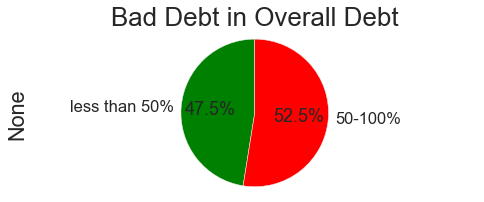

In [66]:
train_df['bins'] = pd.cut(train_df['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"],)
train_df.groupby(['bins']).size().plot(kind='pie',subplots=True,figsize=(8, 3), colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Bad Debt in Overall Debt')
plt.show()

In [67]:
top_2500['Bad_Debt'] = top_2500['second_mortgage'] + top_2500['home_equity'] - top_2500['home_equity_second_mortgage']
top_2500['Good_Debt'] = top_2500['debt'] - top_2500['Bad_Debt']
top_2500.head(15)

state        lat         lng  second_mortgage  pct_own  \
17289             Louisiana  31.099609  -93.202088          1.00000  0.01213   
1211               Kentucky  37.879246  -85.961748          1.00000  0.01067   
7413               Virginia  38.828707  -77.121251          1.00000  0.00666   
16834              Kentucky  37.901474  -85.986474          1.00000  0.00225   
14014            New Jersey  40.867944  -74.114633          0.60870  0.01157   
20807            California  34.067232 -118.292902          0.56000  0.03542   
3285               Virginia  37.297357  -78.396452          0.50000  0.62069   
10812              Maryland  38.944502  -76.969572          0.50000  0.03476   
2350   District of Columbia  38.813245  -77.023847          0.50000  0.01374   
3671             California  34.183584 -118.444345          0.47059  0.03302   
21706               Arizona  33.458658 -111.955104          0.43750  0.05660   
11980         Massachusetts  42.254262  -71.800347          0.43363  0.20247   
12896          Pennsylvania  39.952954  -75.202767          0.39024  0.05041   
7453                  Texas  30.285534  -97.747727          0.36364  0.01737   
15589               Georgia  33.740759  -84.401777          0.34783  0.04026   

                     place                 state          city  COUNTYID  \
17289      Fort Polk North             Louisiana     Fort Polk       115   
1211             Fort Knox              Kentucky     Fort Knox        93   
7413   Bailey's Crossroads              Virginia    Alexandria       510   
16834            Fort Knox              Kentucky     Fort Knox       163   
14014        Garfield City            New Jersey       Passaic        31   
20807  West Hollywood City            California   Los Angeles        37   
3285             Farmville              Virginia     Farmville       147   
10812   Mount Rainier City              Maryland    Mt Rainier        33   
2350       Washington City  District of Columbia     Oxon Hill         1   
3671          Burbank City            California      Van Nuys        37   
21706           Tempe City               Arizona    Scottsdale        13   
11980       Worcester City         Massachusetts     Worcester        27   
12896           Millbourne          Pennsylvania  Philadelphia       101   
7453           Austin City                 Texas        Austin       453   
15589         Atlanta City               Georgia       Atlanta       121   

       STATEID  home_equity  home_equity_second_mortgage     debt  hi_median  \
17289       22      1.00000                      1.00000  1.00000    46500.0   
1211        21      1.00000                      1.00000  1.00000    53248.0   
7413        51      1.00000                      1.00000  1.00000    60591.0   
16834       21      1.00000                      1.00000  1.00000    44822.0   
14014       34      0.00000                      0.00000  0.60870    28053.0   
20807        6      0.44000                      0.00000  1.00000    35334.0   
3285        51      0.00000                      0.00000  0.50000    23236.0   
10812       24      0.50000                      0.50000  1.00000    38457.0   
2350        11      0.50000                      0.50000  1.00000    33418.0   
3671         6      0.25490                      0.25490  1.00000    29324.0   
21706        4      0.43750                      0.43750  0.54688    40883.0   
11980       25      0.43363                      0.43363  0.84956    29037.0   
12896       42      0.21951                      0.00000  0.93902    12881.0   
7453        48      0.36364                      0.36364  0.75758     8309.0   
15589       13      0.34783                      0.34783  0.69565    17818.0   

       family_median  Bad_Debt  Good_Debt  
17289        46593.0   1.00000    0.00000  
1211         55270.0   1.00000    0.00000  
7413         46820.0   1.00000    0.00000  
16834        46983.0   1.00000    0.00000  
14014        29340.0   

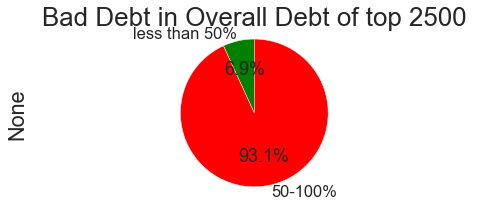

In [68]:
train_df['bins'] = pd.cut(top_2500['Bad_Debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"],)
train_df.groupby(['bins']).size().plot(kind='pie',subplots=True,figsize=(8, 3), colors=['green','red'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Bad Debt in Overall Debt of top 2500')
plt.show()

In [69]:
l1 = list(top_2500['Bad_Debt'] )
l2 = list(top_2500['Good_Debt'] )
l3 = sum(zip(l1, l2+[0]), ())
size = 10
explode = [0.4] * size
explode = tuple(explode)
explode_bd = [0.5] * size*2
explode_bd = tuple(explode_bd)
labels_D = ['GD', 'BD'] * size
labels_D = tuple(labels_D)

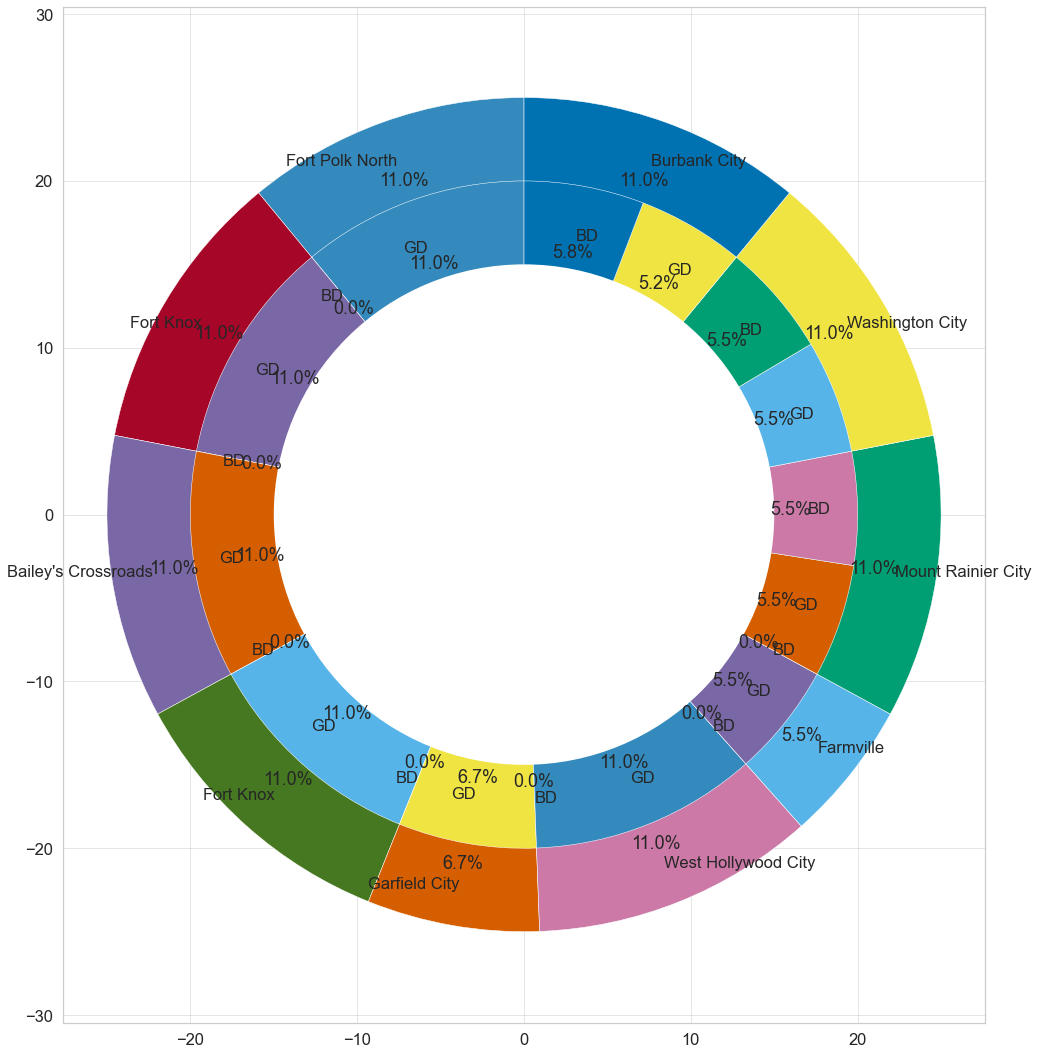

In [70]:
labels = list(top_2500.place[:10])
debt = list(top_2500.debt[:10])

sns.set_style("whitegrid")

gd_bd = l3[:20]

plt.figure(figsize = (15, 15))

plt.pie(debt, labels = labels, startangle = 90, frame = True, radius =25, autopct='%1.1f%%', pctdistance=0.85, labeldistance = 0.9)
plt.pie(gd_bd, labels = labels_D, startangle = 90, frame = True, radius = 20, autopct='%1.1f%%', pctdistance=0.80,  labeldistance = 0.85)
centre_circle = plt.Circle((0,0),15,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [71]:
second_mortgage = list(top_2500.second_mortgage)
home_equity = list(top_2500.home_equity)

Good_Debt = list(top_2500.Good_Debt)
Bad_Debt = list(top_2500.Bad_Debt)

In [72]:
top_2500['city'].value_counts()[:20].index

Index(['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Milwaukee',
       'Aurora', 'Jacksonville', 'Charlotte', 'Bronx', 'Denver', 'Las Vegas',
       'Minneapolis', 'Cincinnati', 'Sacramento', 'Colorado Springs',
       'Baltimore', 'Long Beach', 'San Diego', 'New Orleans', 'Columbus'],
      dtype='object')

In [73]:
cities = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora',
       'Milwaukee', 'Jacksonville', 'Bronx', 'Denver', 'Charlotte',
       'Las Vegas', 'Cincinnati', 'Minneapolis', 'Baltimore', 'Sacramento',
       'Long Beach', 'Colorado Springs', 'Columbus', 'San Diego',
       'New Orleans']

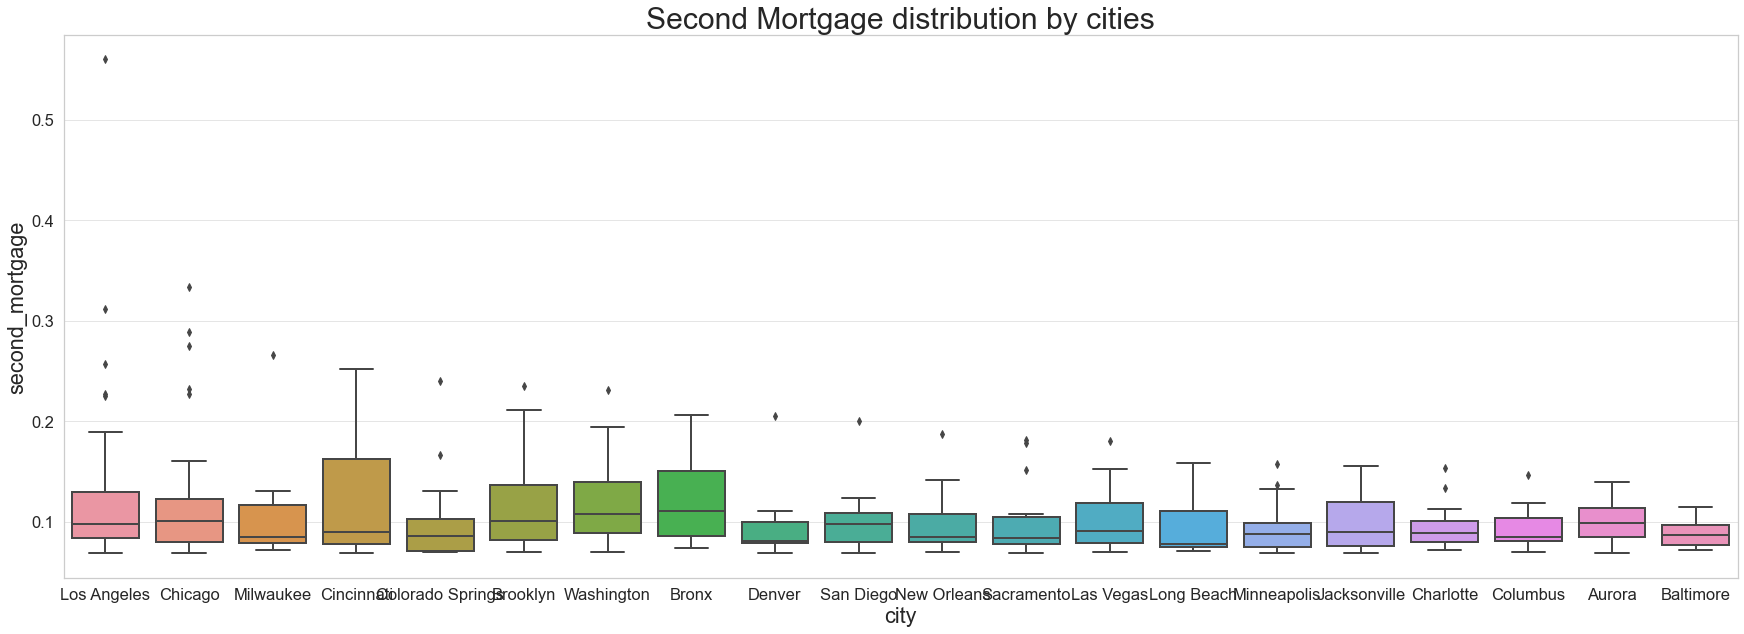

In [74]:
boxplot_df = top_2500[top_2500['city'].isin (cities)]
sns.set_style("whitegrid")
plt.figure(figsize = (30, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df).set_title('Second Mortgage distribution by cities', fontsize = 30)
plt.show()

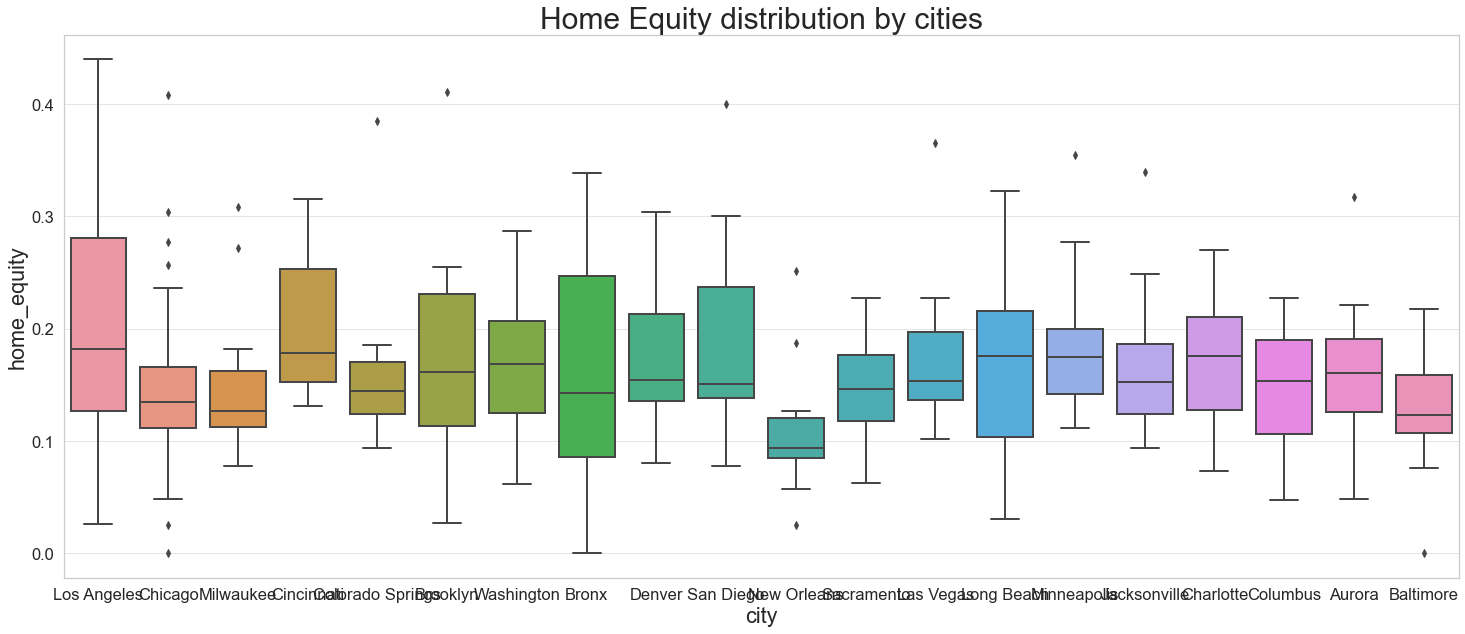

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize = (25, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df).set_title('Home Equity distribution by cities', fontsize = 30)
plt.show()

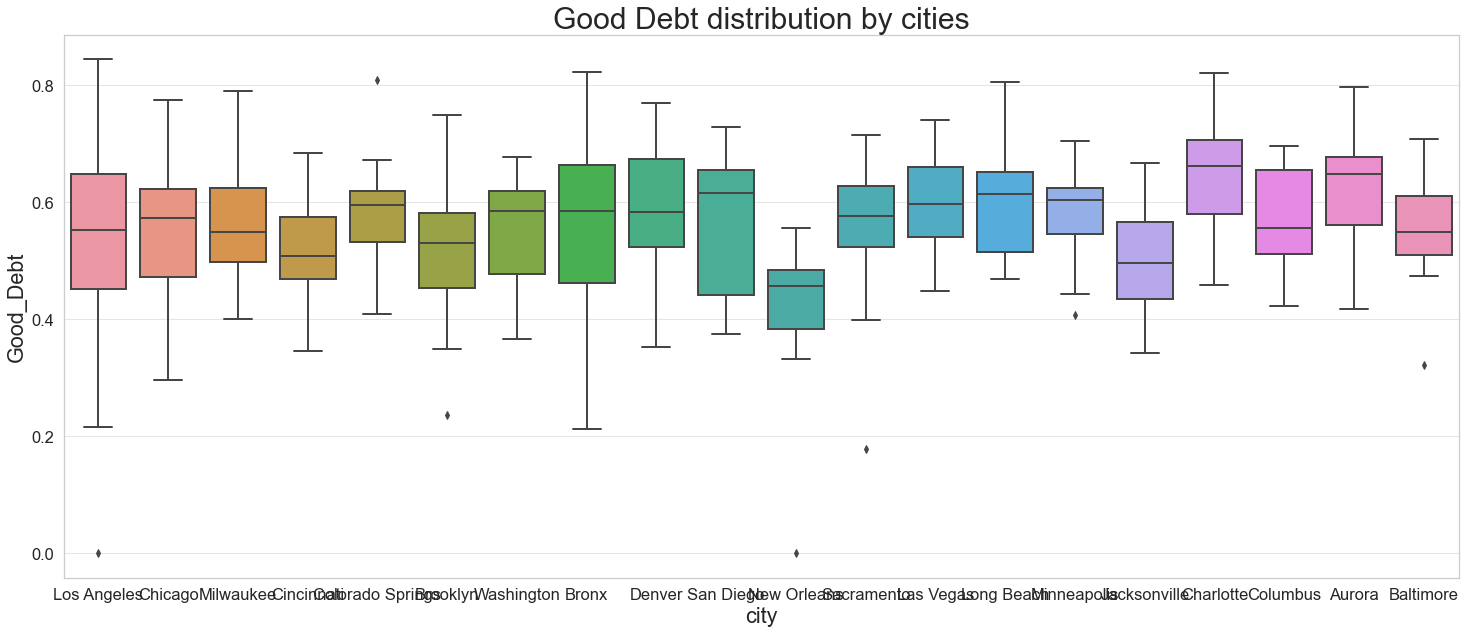

In [76]:
sns.set_style("whitegrid")
plt.figure(figsize = (25, 10))
sns.boxplot(x='city',y='Good_Debt',data=boxplot_df).set_title('Good Debt distribution by cities', fontsize = 30)
plt.show()

In [77]:
top_2500['remaining_income'] = top_2500['family_median'] - top_2500['hi_median']

In [78]:
income_chart = round(top_2500[['city', 'hi_median', 'family_median', 'remaining_income']], 2)
income_chart

city  hi_median  family_median  remaining_income
17289       Fort Polk    46500.0        46593.0              93.0
1211        Fort Knox    53248.0        55270.0            2022.0
7413       Alexandria    60591.0        46820.0          -13771.0
16834       Fort Knox    44822.0        46983.0            2161.0
14014         Passaic    28053.0        29340.0            1287.0
...               ...        ...            ...               ...
21116       Waterbury    28730.0        28843.0             113.0
3071          Clifton    42736.0        46066.0            3330.0
15191         Orlando    47956.0        49757.0            1801.0
19842         Mattoon    40142.0        50786.0           10644.0
11899  Lucerne Valley    24633.0        42856.0           18223.0

[2563 rows x 4 columns]

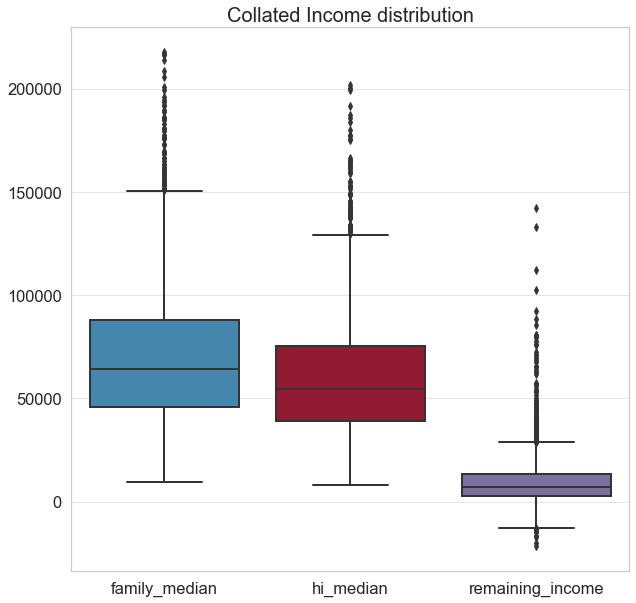

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize = (10,10))
sns.boxplot(data=top_2500[['family_median', 'hi_median', 'remaining_income']], palette=color_pal).set_title('Collated Income distribution', fontsize = 20)
plt.show()

In [80]:
density_eda_df = train_df[['state', 'city', 'place', 'ALand', 'pop', 'male_age_median', 'female_age_median', 'male_pop', 'female_pop']]
density_eda_df.head()

state        city           place        ALand   pop  \
0     New York    Hamilton        Hamilton  202183361.0  5230   
1      Indiana  South Bend        Roseland    1560828.0  2633   
2      Indiana    Danville        Danville   69561595.0  6881   
3  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
4       Kansas   Manhattan  Manhattan City    2554403.0  5637   

   male_age_median  female_age_median  male_pop  female_pop  
0         44.00000           45.33333      2612        2618  
1         32.00000           37.58333      1349        1284  
2         40.83333           42.83333      3643        3238  
3         48.91667           50.58333      1141        1559  
4         22.41667           21.58333      2586        3051

In [81]:
density_eda_df['pop_density'] = density_eda_df['pop'] / density_eda_df['ALand']
density_eda_df['median_age'] = (density_eda_df['male_age_median'] *  density_eda_df['male_pop'] + density_eda_df['female_age_median'] *  density_eda_df['female_pop'])  / density_eda_df['pop']
density_eda_df.nlargest(300, 'pop_density')

<ipython-input-81-3a90d48a6089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_eda_df['pop_density'] = density_eda_df['pop'] / density_eda_df['ALand']
<ipython-input-81-3a90d48a6089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_eda_df['median_age'] = (density_eda_df['male_age_median'] *  density_eda_df['male_pop'] + density_eda_df['female_age_median'] *  density_eda_df['female_pop'])  / density_eda_df['pop']


state           city                place     ALand    pop  \
14417    New York       New York    Mount Vernon City  212070.0  16231   
21050    New York       New York        New York City  182091.0  13162   
10251    New York       New York    Mount Vernon City  169349.0  12189   
1546     New York       New York        New York City  183653.0  12427   
21795  California  San Francisco       Daly City City   61277.0   4101   
...           ...            ...                  ...       ...    ...   
20136  California     San Rafael      San Rafael City  323250.0   7330   
19093    New York       New York        New York City   59282.0   1343   
24412    New York       Brooklyn        New York City  193832.0   4386   
3347     Virginia     Alexandria  Bailey's Crossroads  188743.0   4257   
19464  California  San Francisco       Sausalito City  226078.0   5065   

       male_age_median  female_age_median  male_pop  female_pop  pop_density  \
14417         33.66667           36.08333      8315        7916     0.076536   
21050         38.83333           34.66667      5597        7565     0.072283   
10251         33.25000           35.33333      6110        6079     0.071976   
1546          37.00000           41.83333      5425        7002     0.067666   
21795         49.08333           55.00000      2465        1636     0.066926   
...                ...                ...       ...         ...          ...   
20136         28.33333           27.91667      3860        3470     0.022676   
19093         40.25000           50.91667       547         796     0.022654   
24412         25.83333           29.66667      1868        2518     0.022628   
3347          38.91667           36.00000      2230        2027     0.022554   
19464         42.16667           41.00000      2233        2832     0.022404   

       median_age  
14417   34.845296  
21050   36.438498  
10251   34.289016  
1546    39.723342  
21795   51.443650  
...           ...  
20136   28.136084  
19093   46.572166  
24412   28.034048  
3347    37.527877  
19464   41.514348  

[300 rows x 11 columns]

In [82]:
pop_density_300 = density_eda_df.nlargest(300, 'pop_density')

In [83]:
cities = pop_density_300['city'].unique()
cities

array(['New York', 'San Francisco', 'Bronx', 'Brooklyn', 'Elmhurst',
       'Flushing', 'Jackson Heights', 'Long Island City', 'Forest Hills',
       'Trenton', 'Chicago', 'Corona', 'Jamaica', 'Woodside', 'Glendale',
       'Los Angeles', 'Astoria', 'Honolulu', 'Richmond Hill', 'Baltimore',
       'East Elmhurst', 'Rego Park', 'Guttenberg', 'Union City',
       'West New York', 'Boston', 'Washington', 'Ridgewood', 'Arlington',
       'Ozone Park', 'Corte Madera', 'Philadelphia', 'Hoboken',
       'Staten Island', 'San Rafael', 'Alexandria'], dtype=object)

In [84]:
len(cities)

36

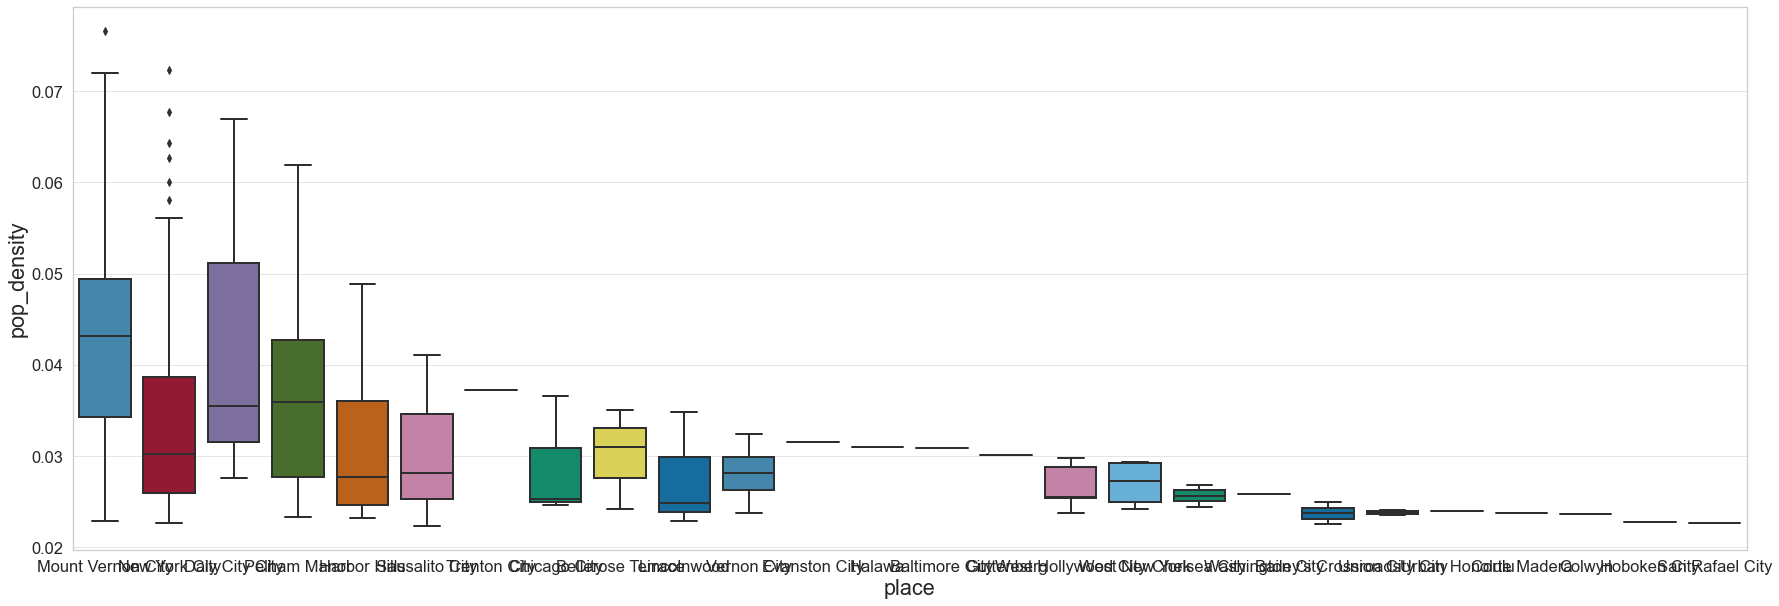

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize = (30, 10))
sns.boxplot(x = 'place', y = 'pop_density', data=density_eda_df.nlargest(300, 'pop_density'), palette=color_pal)
plt.show()

In [86]:
list(density_eda_df.nsmallest(450, 'pop_density').state.unique())

['Florida',
 'Alaska',
 'Montana',
 'Utah',
 'Puerto Rico',
 'Kentucky',
 'Oregon',
 'Nevada',
 'Colorado',
 'Idaho',
 'California',
 'New Mexico',
 'Maine',
 'South Dakota',
 'Wyoming',
 'Texas',
 'Nebraska',
 'Kansas',
 'North Dakota',
 'Arizona',
 'Washington',
 'South Carolina',
 'New York',
 'Tennessee',
 'Oklahoma',
 'Minnesota',
 'Louisiana',
 'Michigan',
 'Wisconsin',
 'North Carolina',
 'Maryland',
 'Georgia',
 'Mississippi',
 'New Hampshire',
 'Missouri',
 'Virginia']

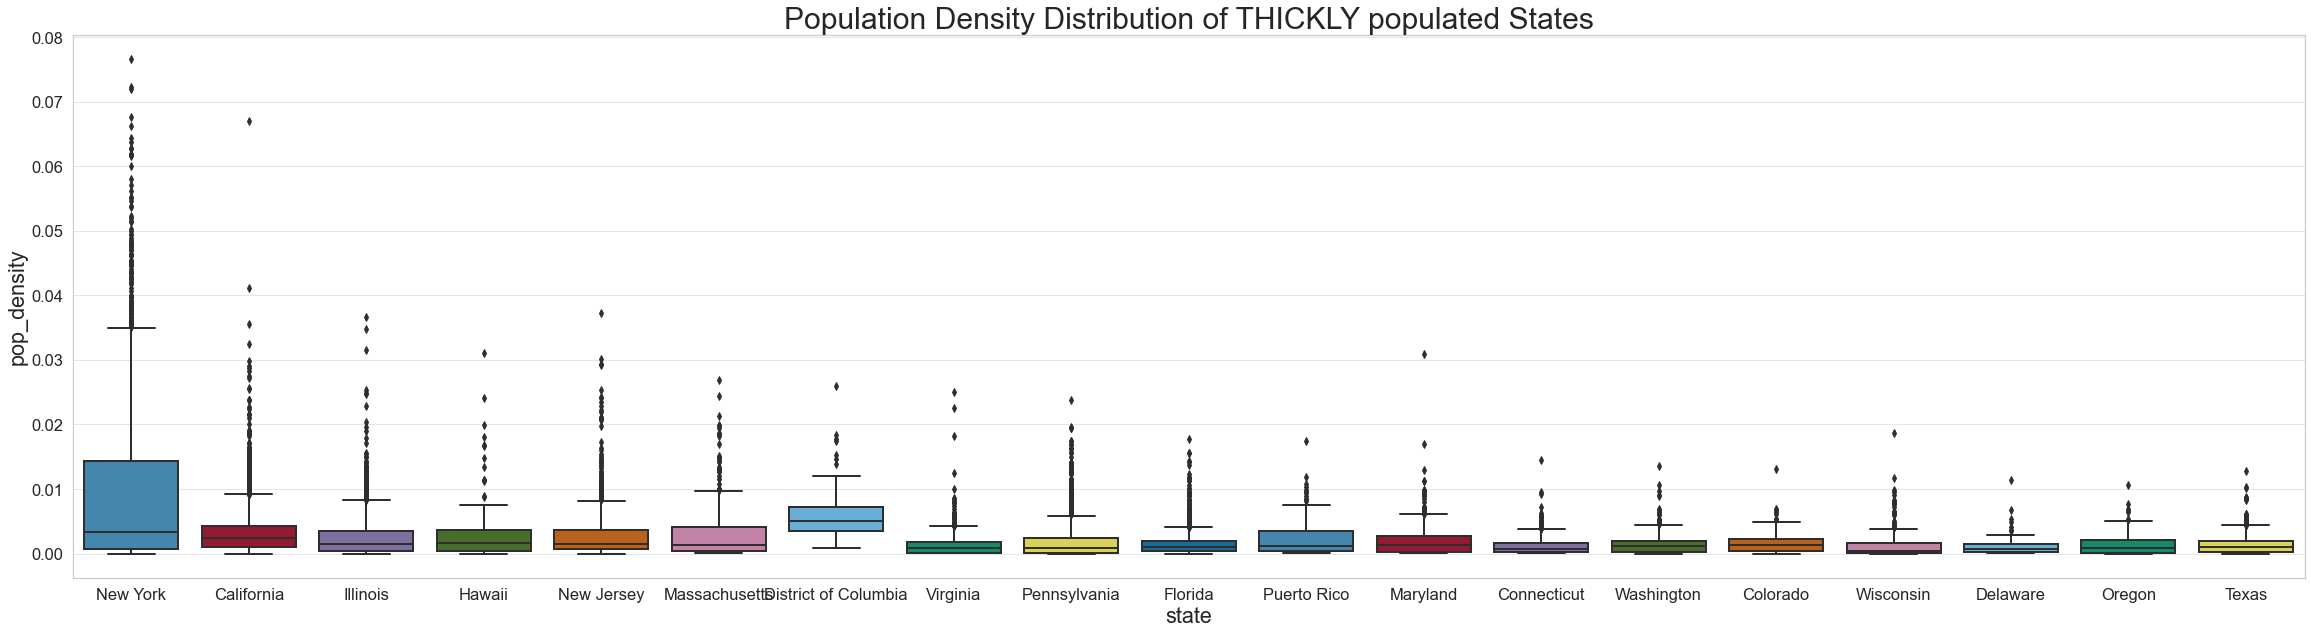

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))
sns.boxplot(x = 'state', y = 'pop_density', data=density_eda_df.nlargest(26585, 'pop_density'), palette=color_pal, order = ['New York', 'California', 'Illinois', 'Hawaii', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Virginia',
                                                                                                                                                                            'Pennsylvania', 'Florida', 'Puerto Rico', 'Maryland', 'Connecticut', 'Washington', 'Colorado', 'Wisconsin',
                                                                                                                            'Delaware', 'Oregon', 'Texas']).set_title('Population Density Distribution of THICKLY populated States', fontsize = 30)
plt.show()

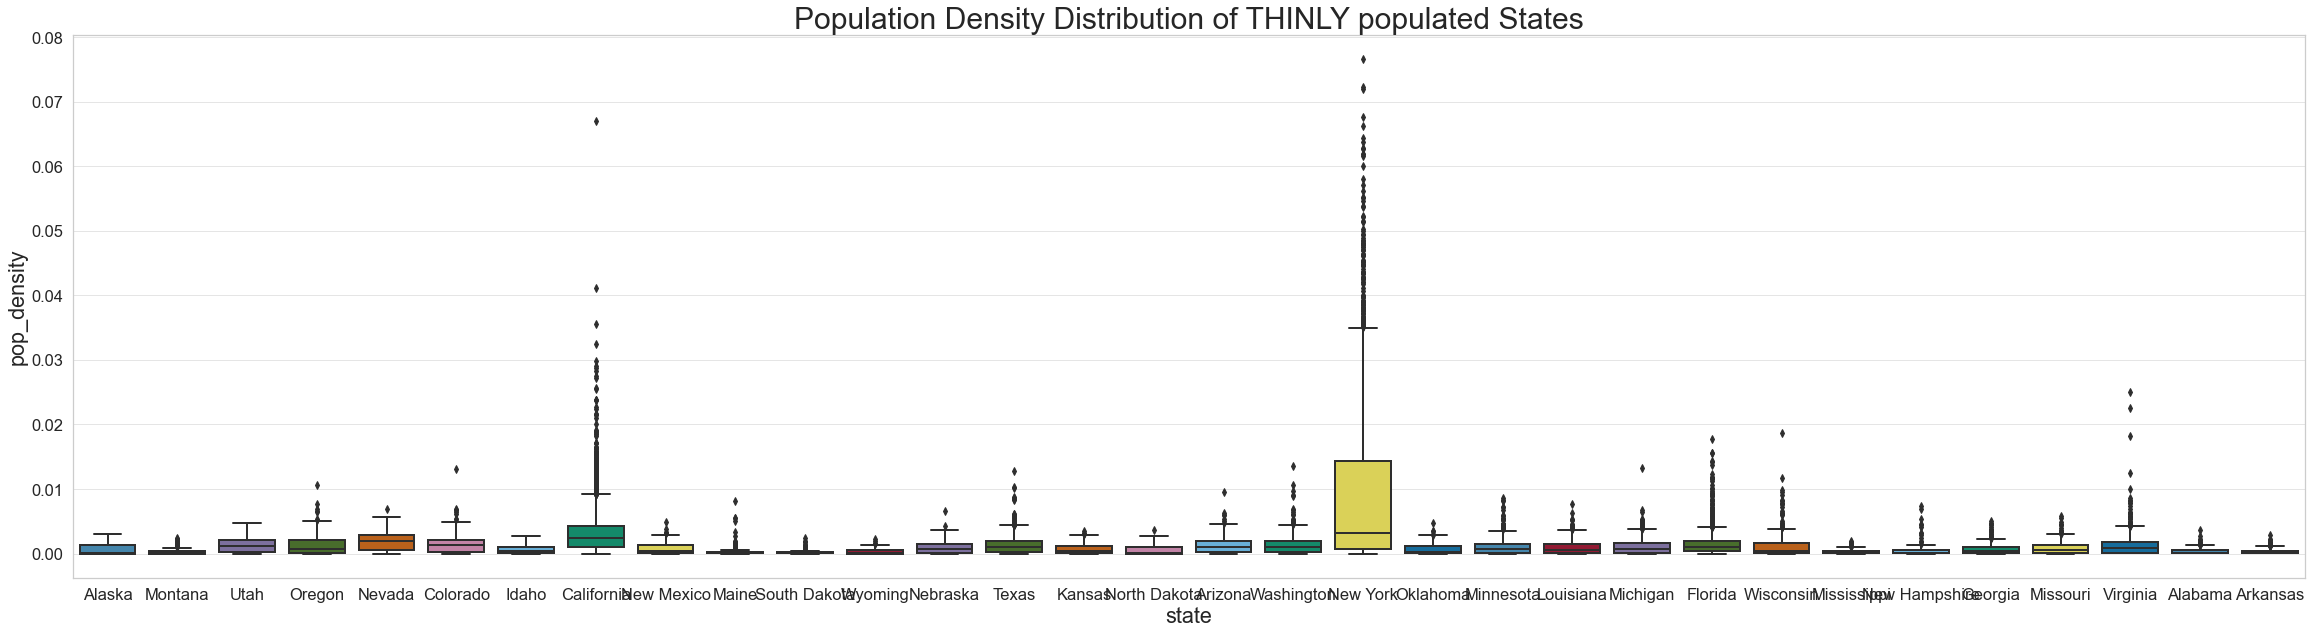

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))
sns.boxplot(x = 'state', y = 'pop_density', data=density_eda_df.nsmallest(27019, 'pop_density'), palette=color_pal, order = ['Alaska', 'Montana', 'Utah', 'Oregon', 'Nevada', 'Colorado', 'Idaho', 'California', 'New Mexico',
                                                                                                                                                                                 'Maine', 'South Dakota', 'Wyoming', 'Nebraska', 'Texas', 'Kansas', 'North Dakota', 'Arizona',
                                                                                                                                                                                 'Washington', 'New York', 'Oklahoma', 'Minnesota', 'Louisiana', 'Michigan', 'Florida', 'Wisconsin', 'Mississippi',
                                                                                                                                                                                 'New Hampshire', 'Georgia', 'Missouri', 'Virginia', 'Alabama', 'Arkansas']).set_title('Population Density Distribution of THINLY populated States', fontsize = 30)
plt.show()

In [89]:
age_df = train_df[['state', 'city', 'place', 'pop', 'male_pop', 'female_pop', 'male_age_median', 'female_age_median', 'married', 'separated', 'divorced']]
train_df.male_age_median.unique()

array([44.        , 32.        , 40.83333   , 48.91667   , 22.41667   ,
       41.41667   , 40.        , 53.08333   , 30.66667   , 47.33333   ,
       34.33333   , 46.91667   , 49.75      , 34.66667   , 42.58333   ,
       45.83333   , 44.16667   , 32.5       , 30.41667   , 27.41667   ,
       30.08333   , 41.16667   , 38.75      , 30.        , 31.16667   ,
       46.75      , 36.66667   , 38.16667   , 34.91667   , 40.16667   ,
       27.66667   , 39.33333   , 42.83333   , 36.41667   , 41.91667   ,
       44.5       , 51.75      , 43.41667   , 51.66667   , 34.        ,
       64.08333   , 51.41667   , 20.25      , 29.        , 28.        ,
       41.25      , 49.83333   , 34.5       , 24.91667   , 45.41667   ,
       28.16667   , 34.08333   , 36.91667   , 46.66667   , 36.16667   ,
       36.75      , 38.5       , 36.08333   , 47.5       , 51.16667   ,
       48.16667   , 33.        , 25.25      , 37.08333   , 42.66667   ,
       40.25      , 29.75      , 38.41667   , 37.41667   , 42.  

In [90]:
bins = [0, 12,18, 35, 55, 100]
labels = ['kids', 'Young Adult', 'Youth ' , 'Adult', 'Senior']

In [91]:
age_df['male_population_bracket'] = pd.cut(age_df['male_age_median'], bins, labels = labels)
age_df['female_population_bracket'] = pd.cut(age_df['female_age_median'], bins, labels = labels)
age_df.head()

<ipython-input-91-e772c5b3b9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['male_population_bracket'] = pd.cut(age_df['male_age_median'], bins, labels = labels)
<ipython-input-91-e772c5b3b9dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['female_population_bracket'] = pd.cut(age_df['female_age_median'], bins, labels = labels)


state        city           place   pop  male_pop  female_pop  \
0     New York    Hamilton        Hamilton  5230      2612        2618   
1      Indiana  South Bend        Roseland  2633      1349        1284   
2      Indiana    Danville        Danville  6881      3643        3238   
3  Puerto Rico    San Juan        Guaynabo  2700      1141        1559   
4       Kansas   Manhattan  Manhattan City  5637      2586        3051   

   male_age_median  female_age_median  married  separated  divorced  \
0         44.00000           45.33333  0.57851    0.01240   0.08770   
1         32.00000           37.58333  0.34886    0.01426   0.09030   
2         40.83333           42.83333  0.64745    0.01607   0.10657   
3         48.91667           50.58333  0.47257    0.02021   0.10106   
4         22.41667           21.58333  0.12356    0.00000   0.03109   

  male_population_bracket female_population_bracket  
0                   Adult                     Adult  
1                  Youth                      Adult  
2                   Adult                     Adult  
3                   Adult                     Adult  
4                  Youth                     Youth

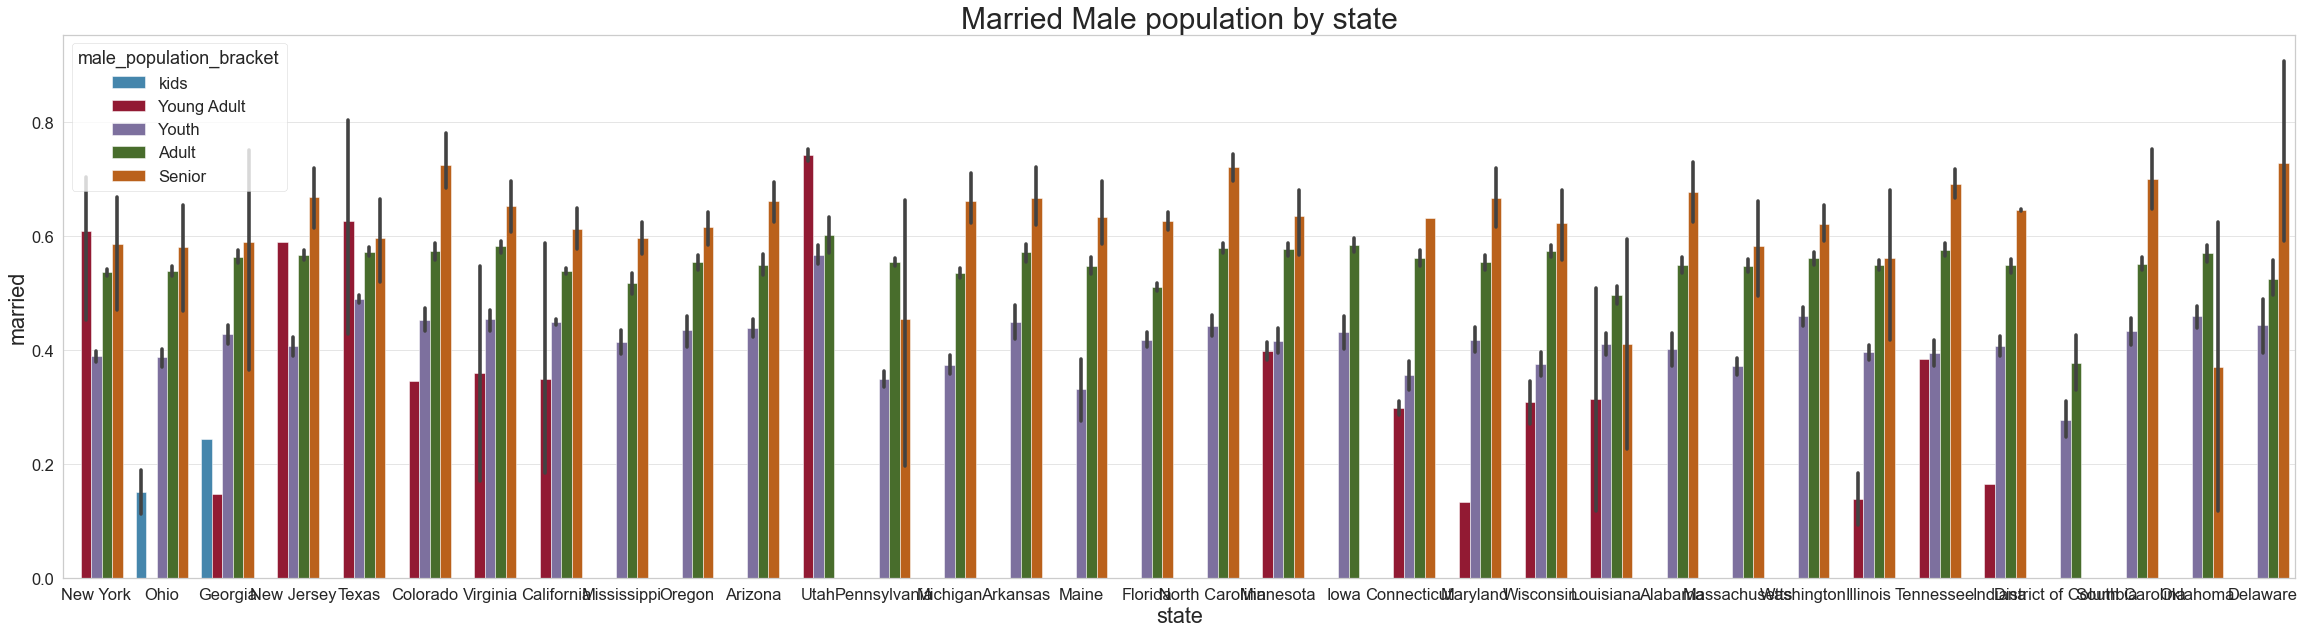

In [92]:
sns.set_style("whitegrid")

plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Male population by state', fontsize = 30)

plt.show()

In [93]:
age_df.city.unique()

array(['Hamilton', 'South Bend', 'Danville', ..., 'Blue Bell', 'Weldona',
       'Colleyville'], dtype=object)

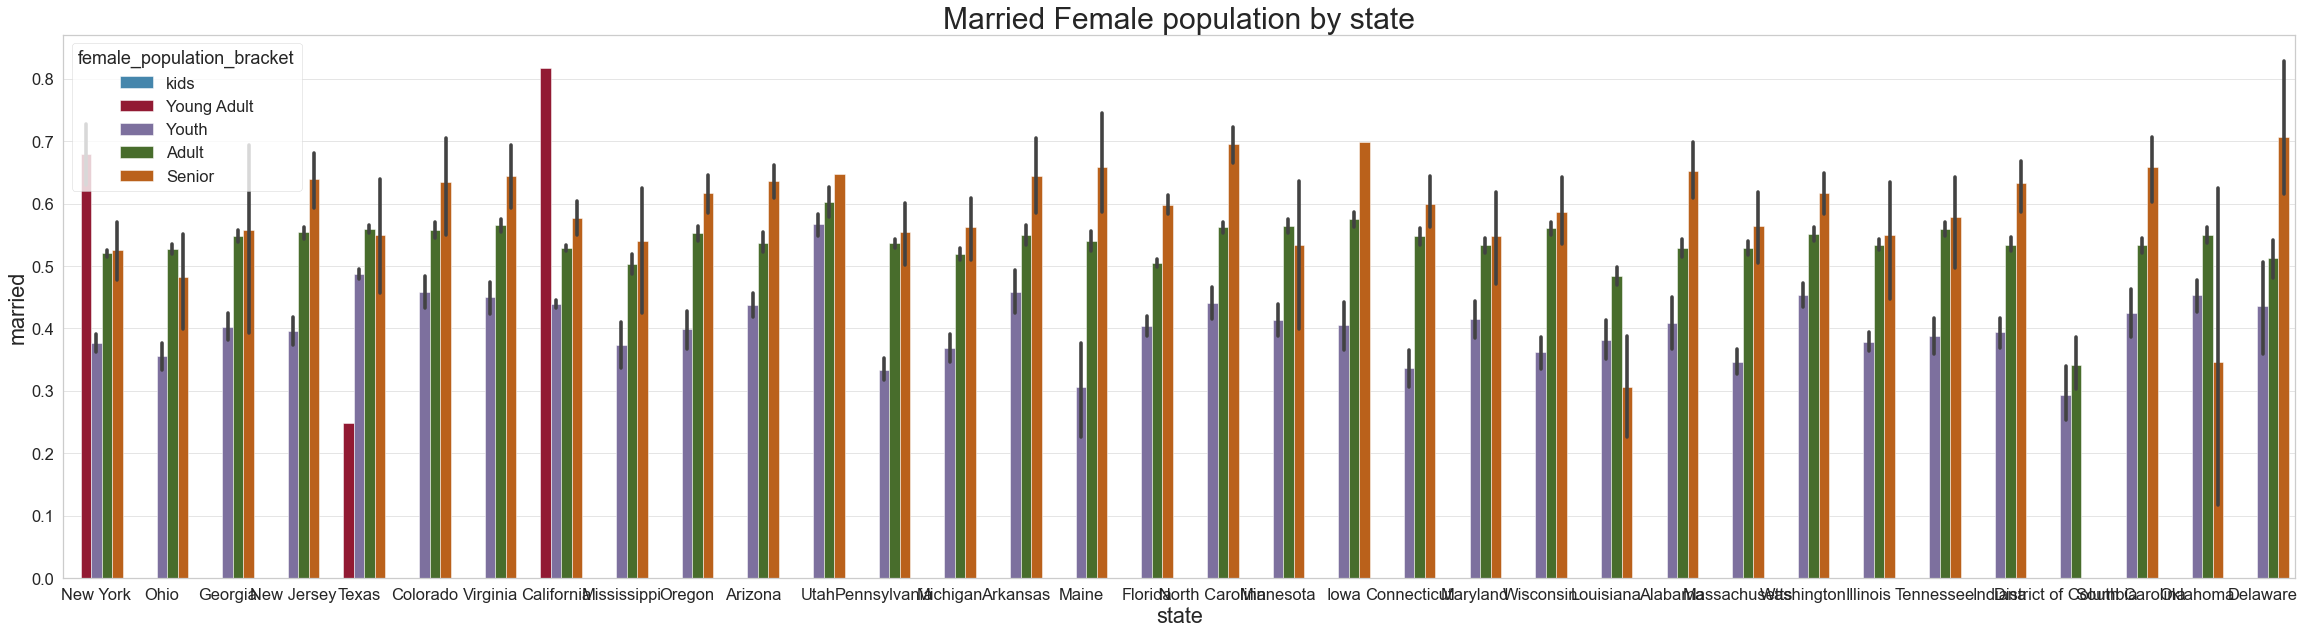

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Female population by state', fontsize = 30)

plt.show()

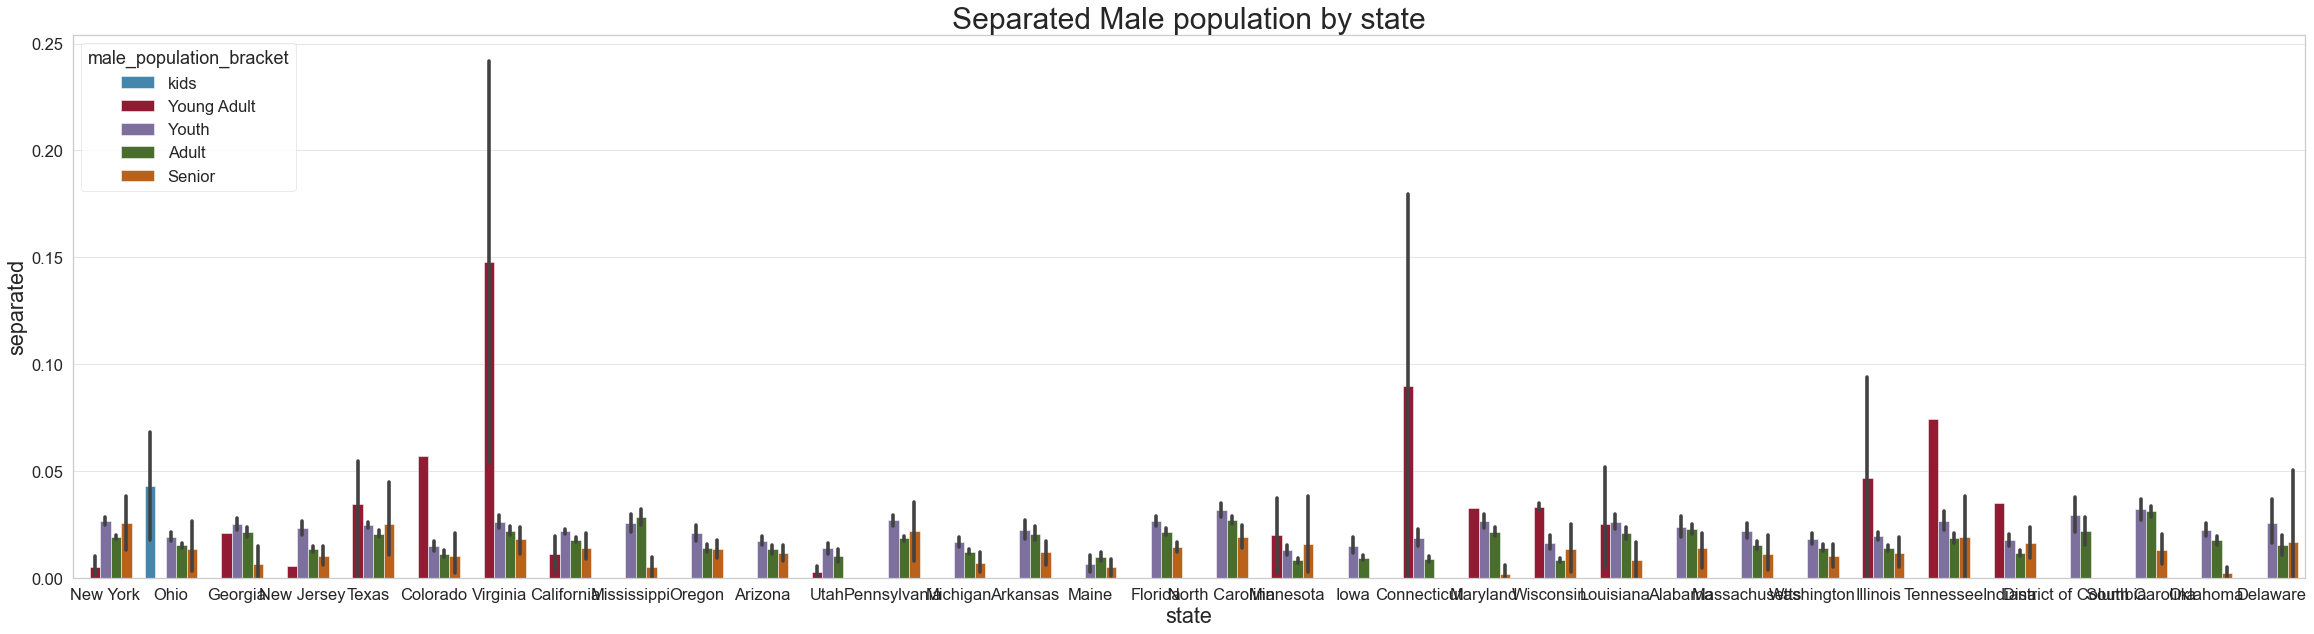

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Male population by state', fontsize = 30)

plt.show()

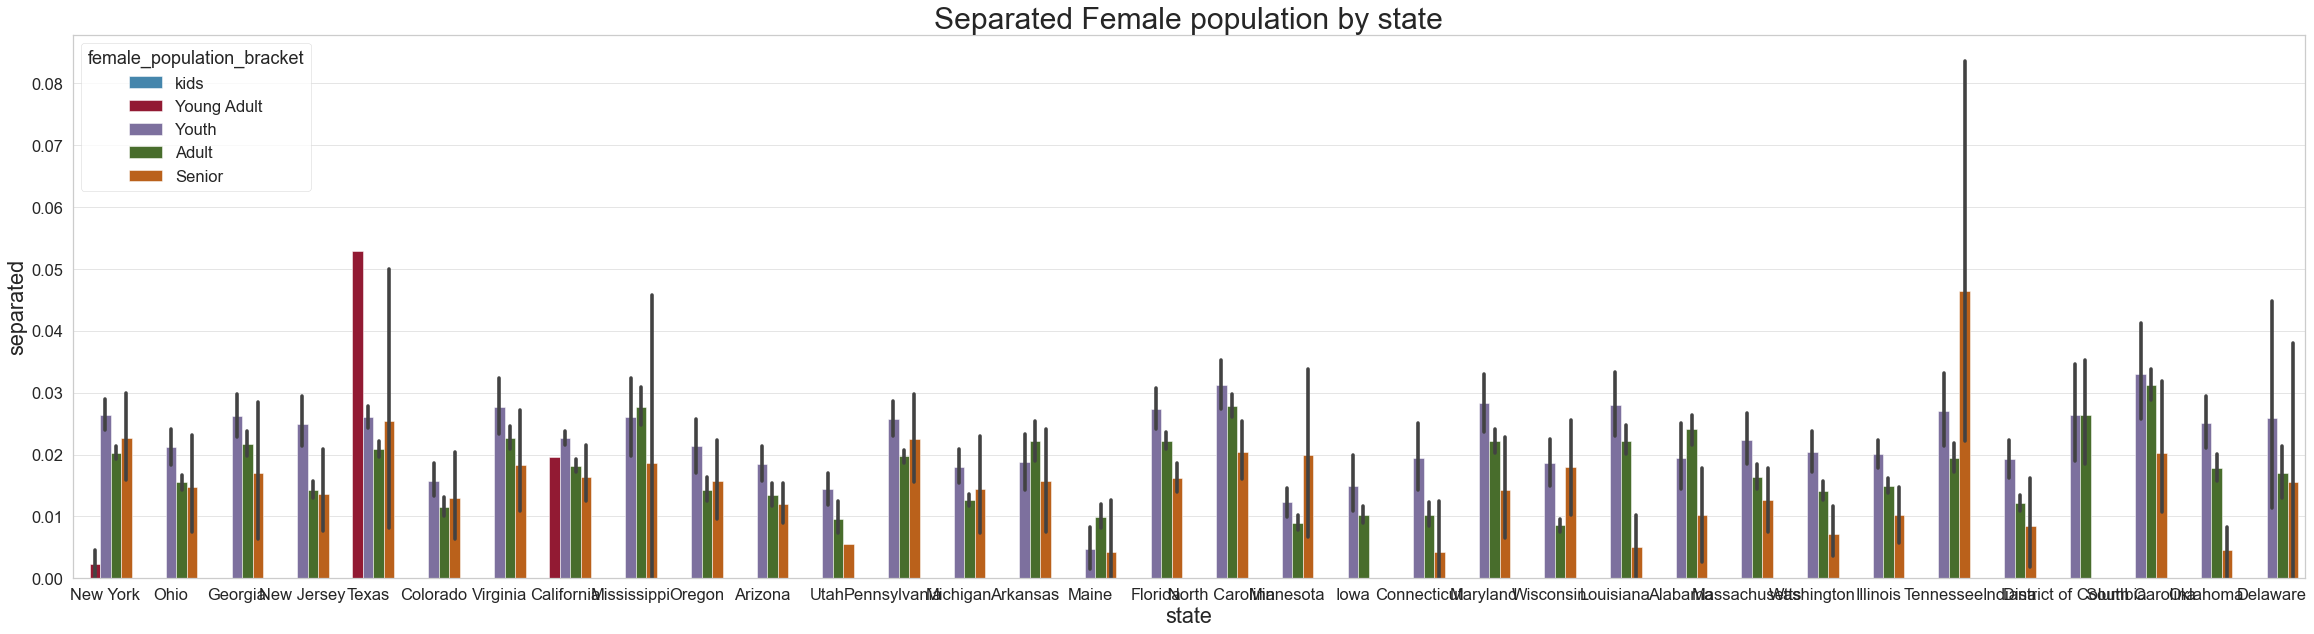

In [96]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Female population by state', fontsize = 30)

plt.show()

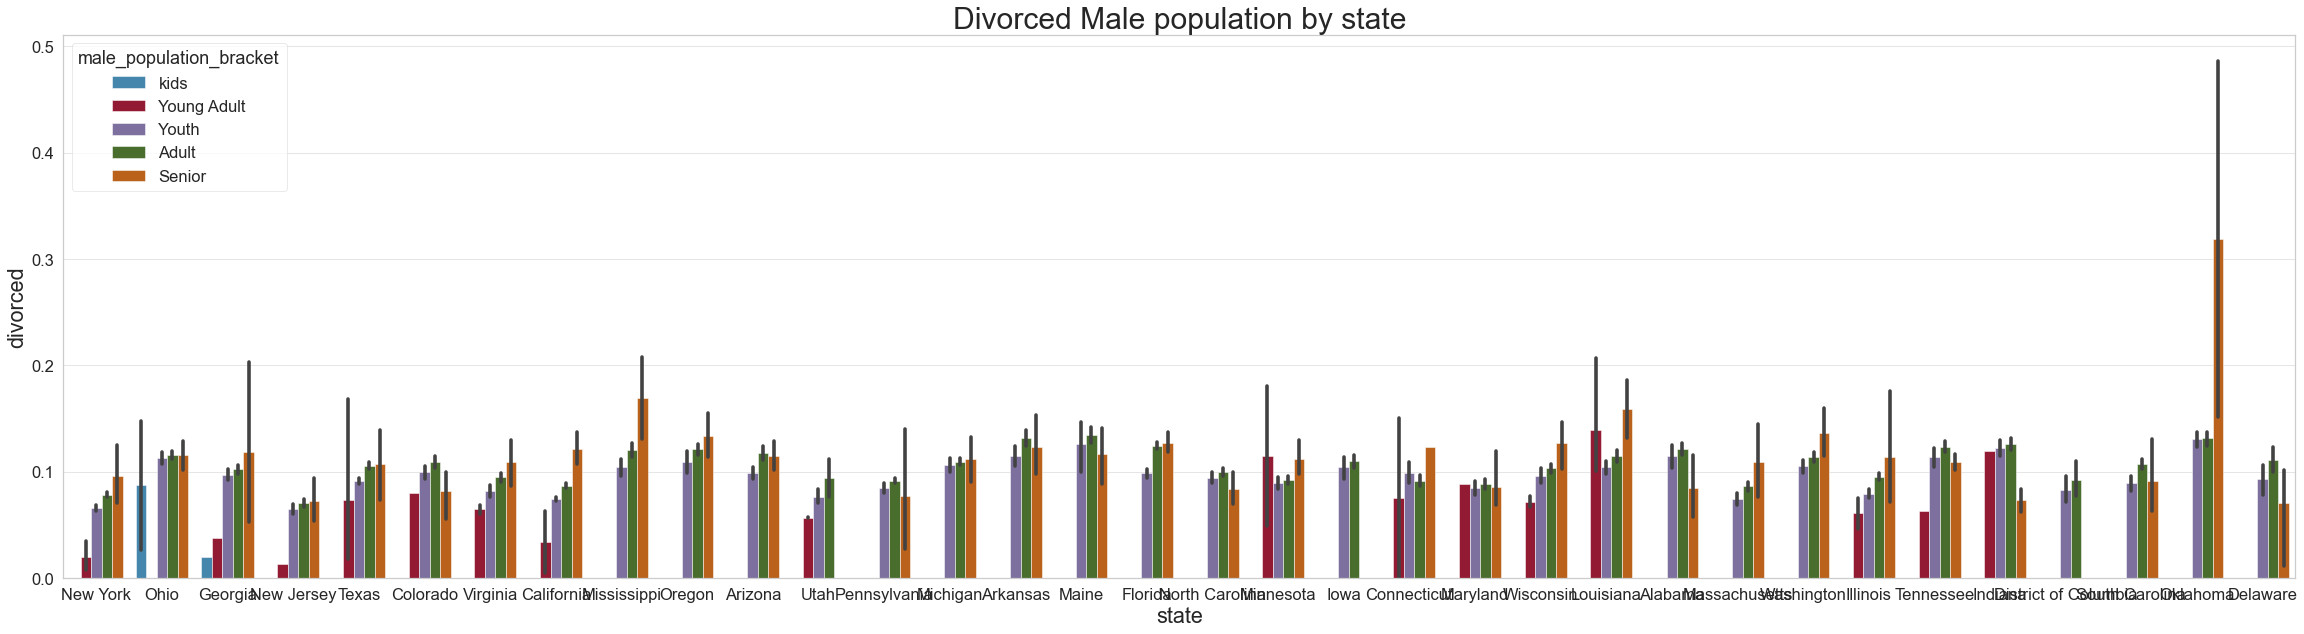

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Divorced Male population by state', fontsize = 30)

plt.show()

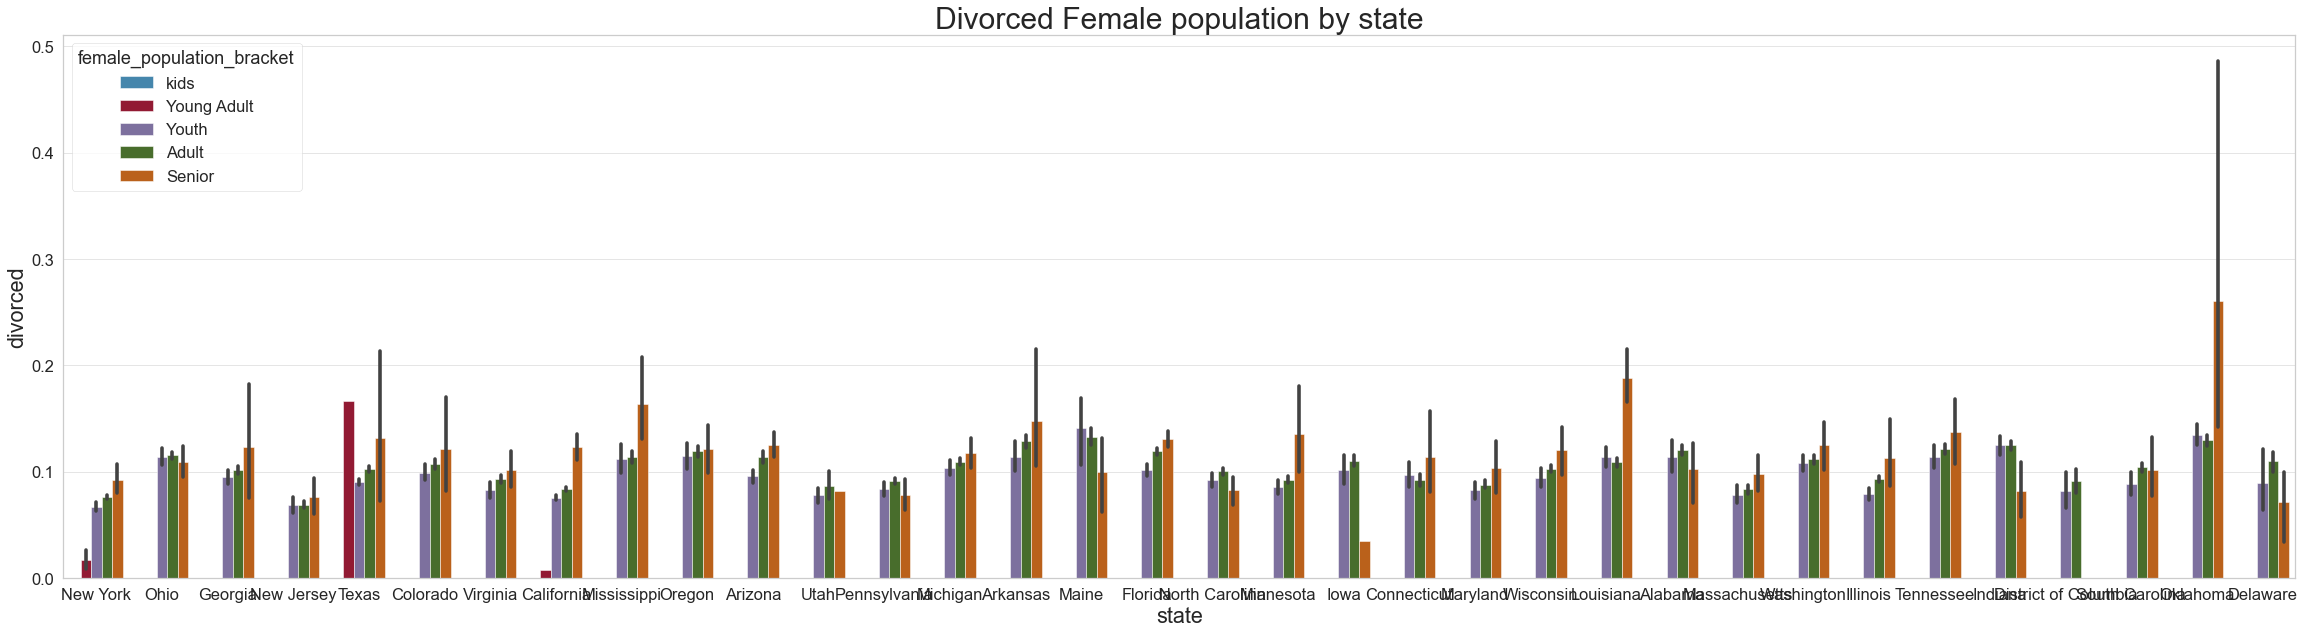

In [98]:
sns.set_style("whitegrid")

plt.figure(figsize = (40, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = age_df, palette=color_pal, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Divorced Female population by state', fontsize = 30)

plt.show()

In [99]:
rent_df = train_df[['state', 'city', 'rent_median', 'hi_median', 'family_median']]
Overall_rent_percentage = (rent_df['rent_median'].sum() / rent_df['hi_median'].sum()) * 100
round(Overall_rent_percentage, 2)

1.75

In [100]:
rent_df['ov_rent_pcnt'] = round((rent_df['rent_median'] / rent_df['hi_median']) * 100, 2)

<ipython-input-100-bc97e1f802ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['ov_rent_pcnt'] = round((rent_df['rent_median'] / rent_df['hi_median']) * 100, 2)


In [101]:
rent_df.head()

state        city  rent_median  hi_median  family_median  \
0     New York    Hamilton        784.0    48120.0        53245.0   
1      Indiana  South Bend        848.0    35186.0        43023.0   
2      Indiana    Danville        703.0    74964.0        85395.0   
3  Puerto Rico    San Juan        782.0    37845.0        44399.0   
4       Kansas   Manhattan        881.0    22497.0        50272.0   

   ov_rent_pcnt  
0          1.63  
1          2.41  
2          0.94  
3          2.07  
4          3.92

In [102]:
print(list(rent_df.nlargest(500, 'ov_rent_pcnt').state.unique()))
print(len(list(rent_df.nlargest(500, 'ov_rent_pcnt').state.unique())))

['Florida', 'Arizona', 'Virginia', 'Illinois', 'Georgia', 'Texas', 'North Carolina', 'Louisiana', 'Ohio', 'California', 'Indiana', 'Wisconsin', 'New York', 'Washington', 'Oregon', 'Pennsylvania', 'Michigan', 'Tennessee', 'Maryland', 'Mississippi', 'Alabama', 'Iowa', 'Puerto Rico', 'New Jersey', 'South Carolina', 'Wyoming', 'Hawaii', 'Utah', 'Missouri', 'Connecticut', 'Minnesota', 'Massachusetts', 'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Kentucky', 'Maine', 'Arkansas', 'Vermont', 'Rhode Island']
42


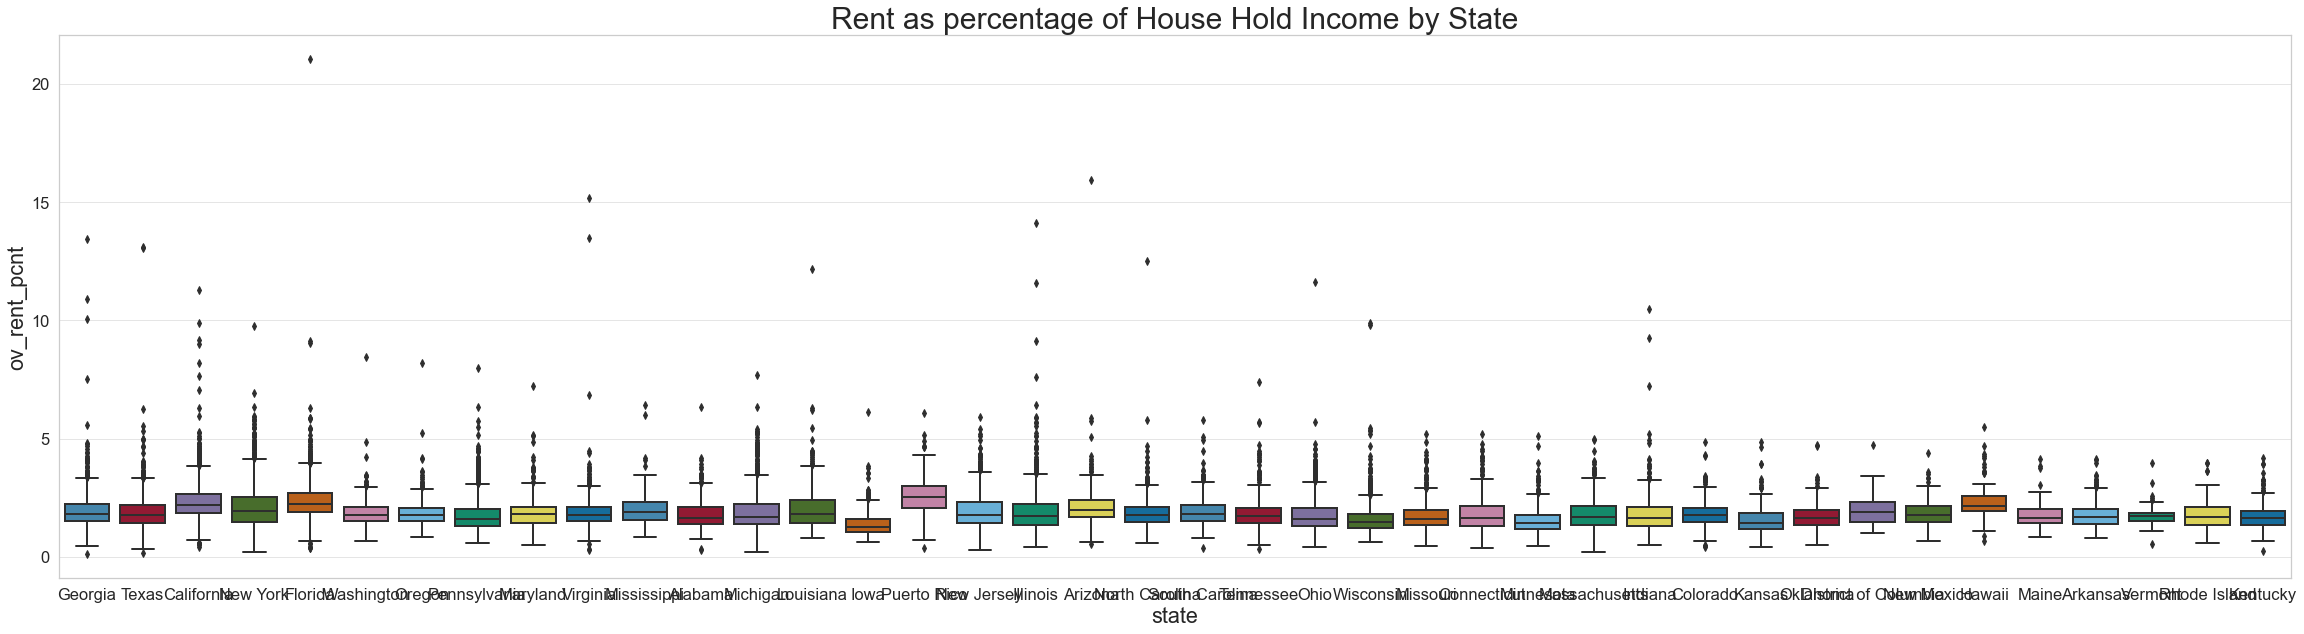

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize = (40,10))
ax = sns.boxplot(x = 'state', y = 'ov_rent_pcnt', data=rent_df.nlargest(27019, 'ov_rent_pcnt'), palette=color_pal, 
            order = ['Georgia', 'Texas', 'California', 'New York', 'Florida', 'Washington', 'Oregon', 'Pennsylvania', 'Maryland', 'Virginia', 'Mississippi', 'Alabama', 'Michigan', 'Louisiana', 
                     'Iowa', 'Puerto Rico', 'New Jersey', 'Illinois', 'Arizona', 'North Carolina', 'South Carolina', 'Tennessee', 'Ohio', 'Wisconsin', 'Missouri', 'Connecticut', 'Minnesota', 
                     'Massachusetts', 'Indiana', 'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Hawaii', 'Maine', 'Arkansas', 'Vermont', 'Rhode Island', 'Kentucky']
           ).set_title('Rent as percentage of House Hold Income by State', fontsize = 30)
plt.show()

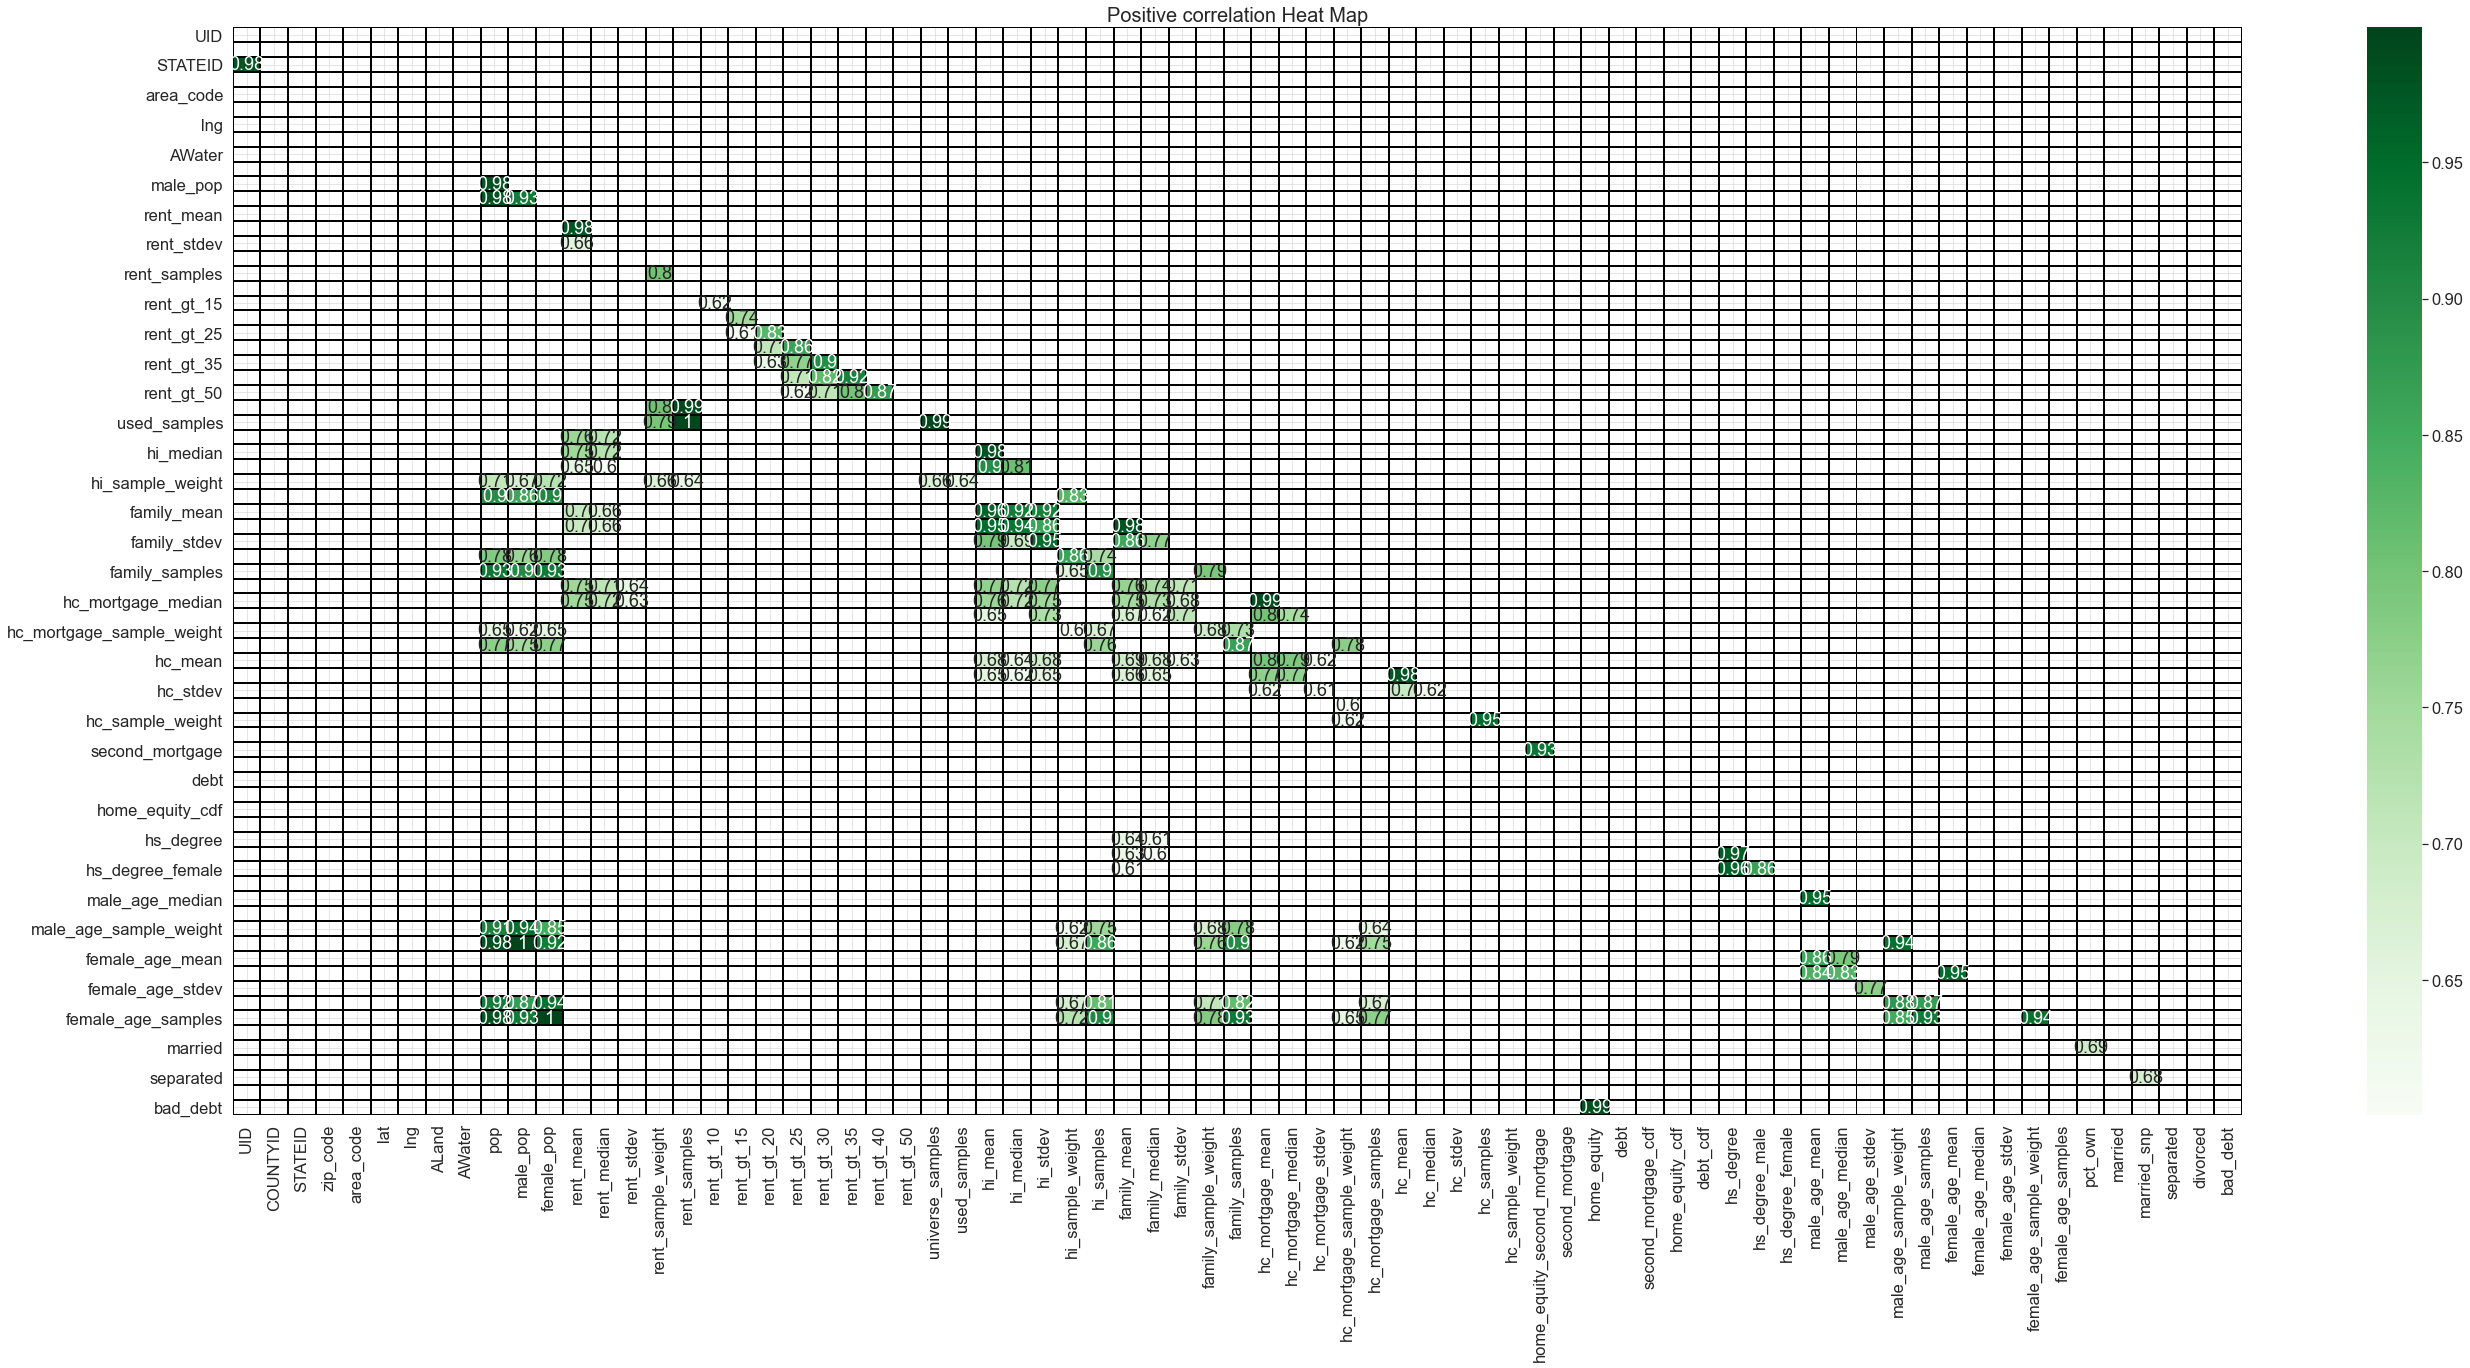

In [104]:
sns.set_style("whitegrid")

corr = train_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

kot = corr[corr>=.6]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Greens", annot = True, mask = mask, linewidths=1, linecolor='black').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

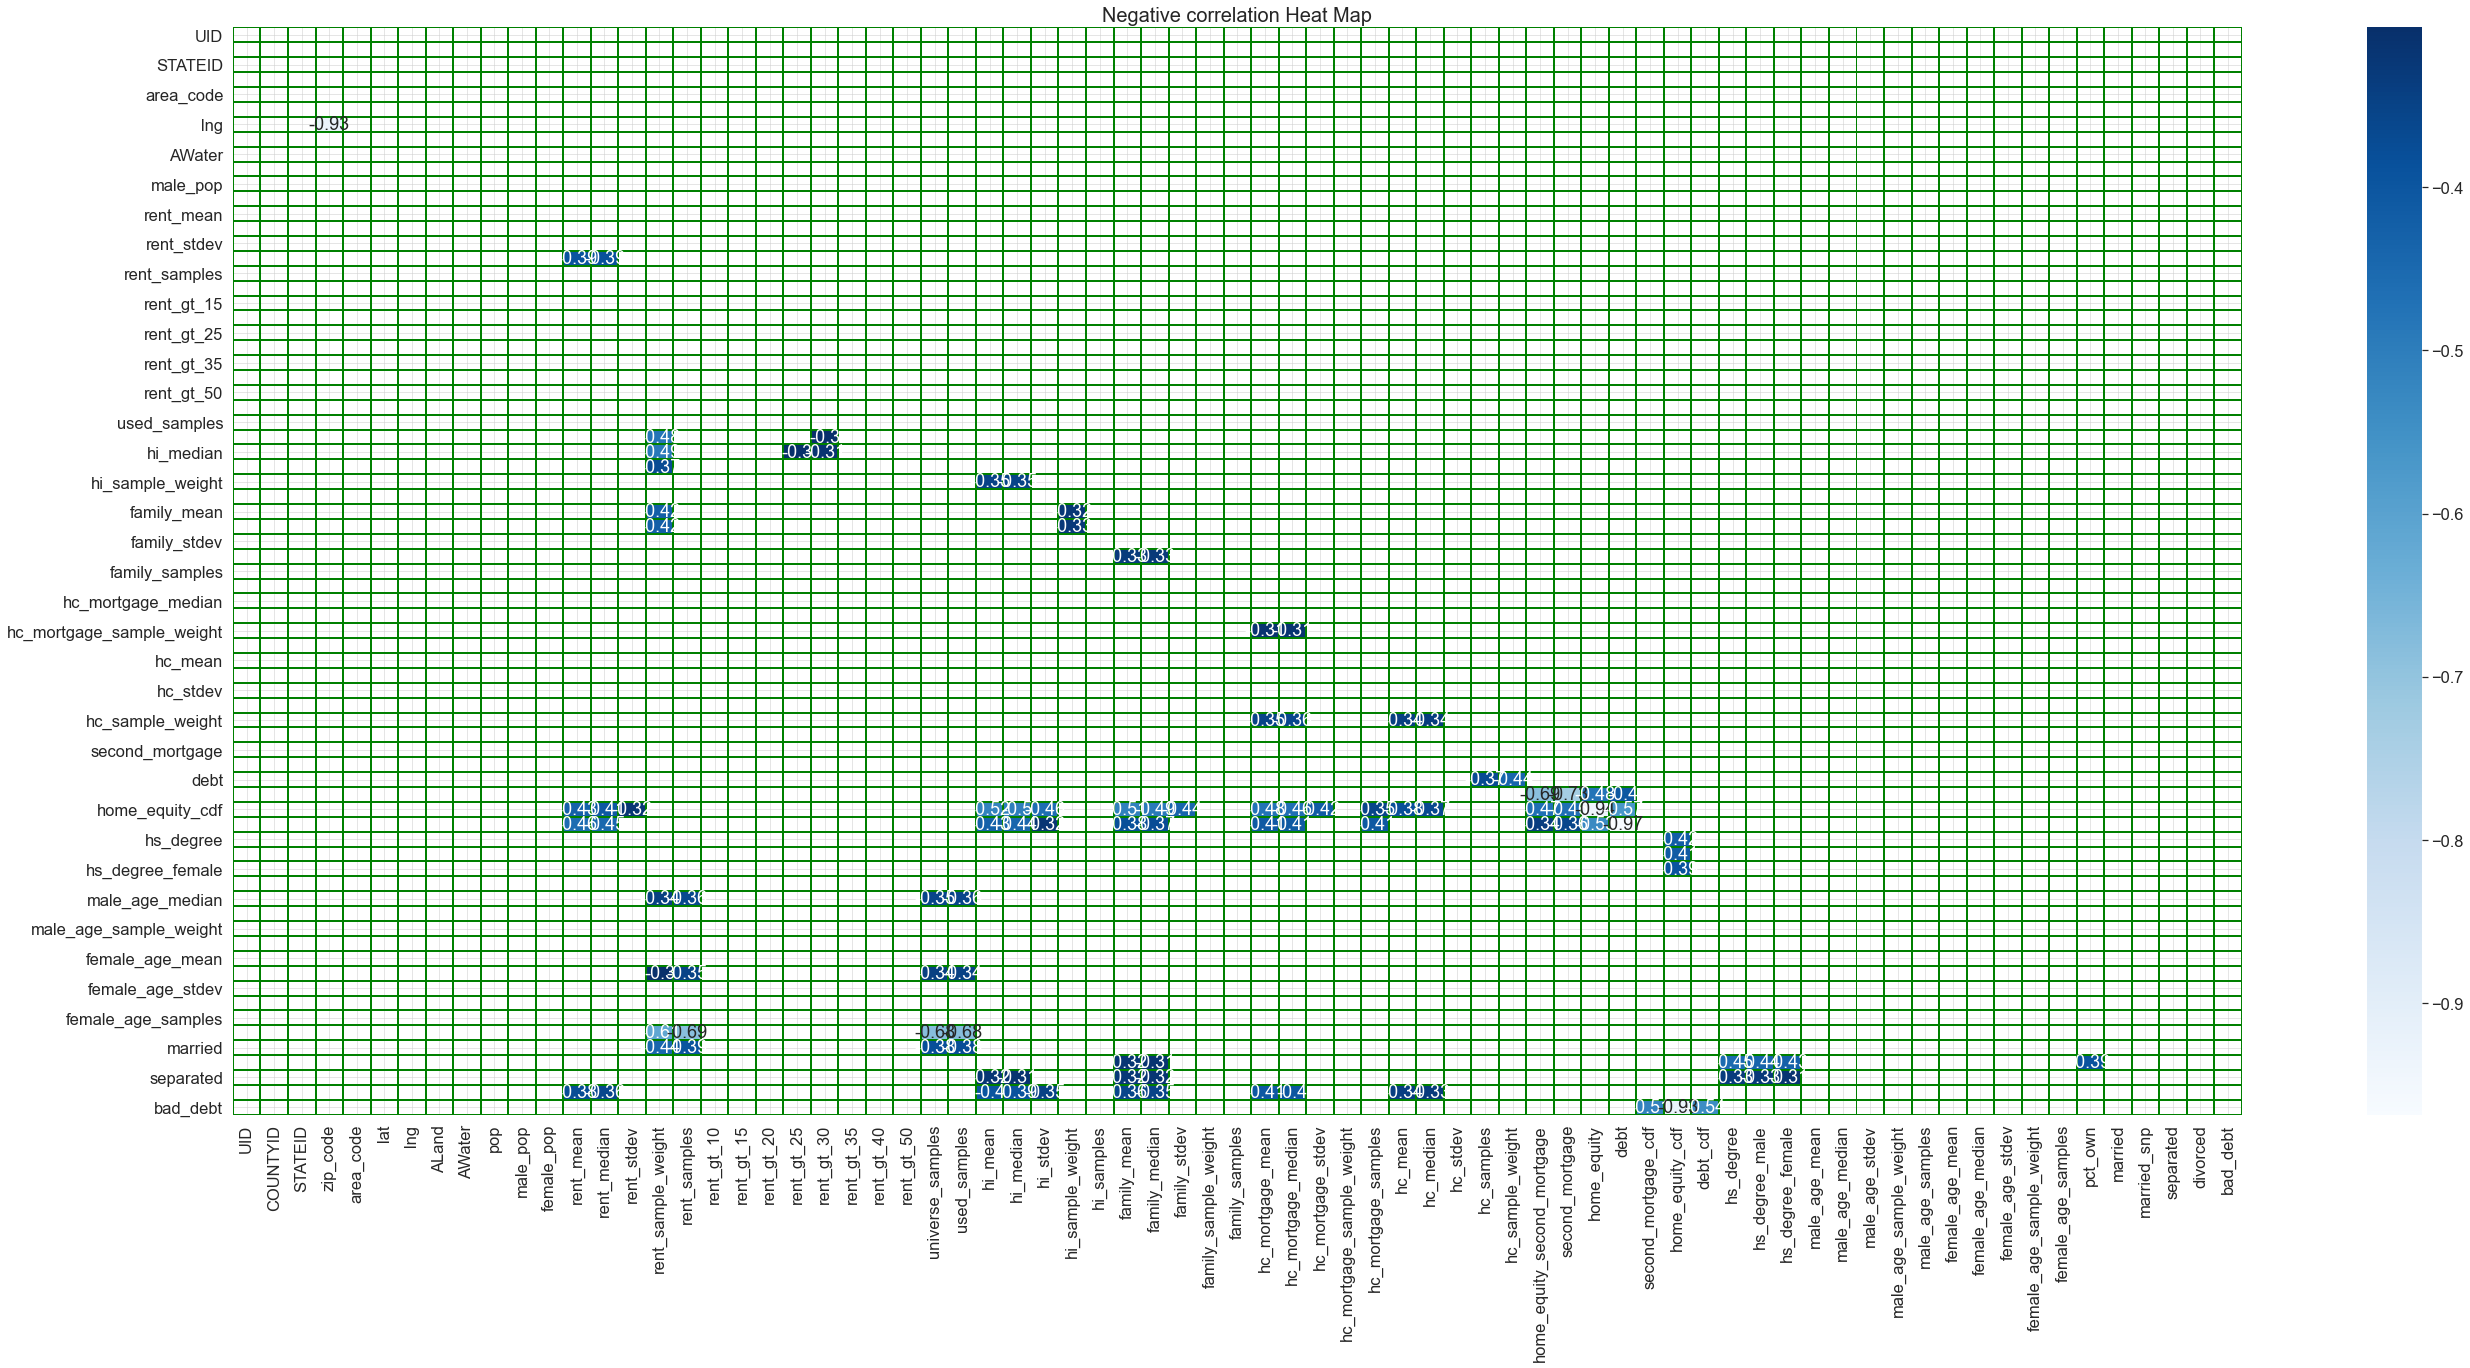

In [105]:
sns.set_style("whitegrid")
kot = corr[corr <=-.3]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Blues", annot = True, mask = mask, linewidths=1, linecolor='green').set_title('Negative correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

In [106]:
cor=train_df[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'male_age_median','female_age_median','pct_own', 'married','separated', 'divorced']].corr()

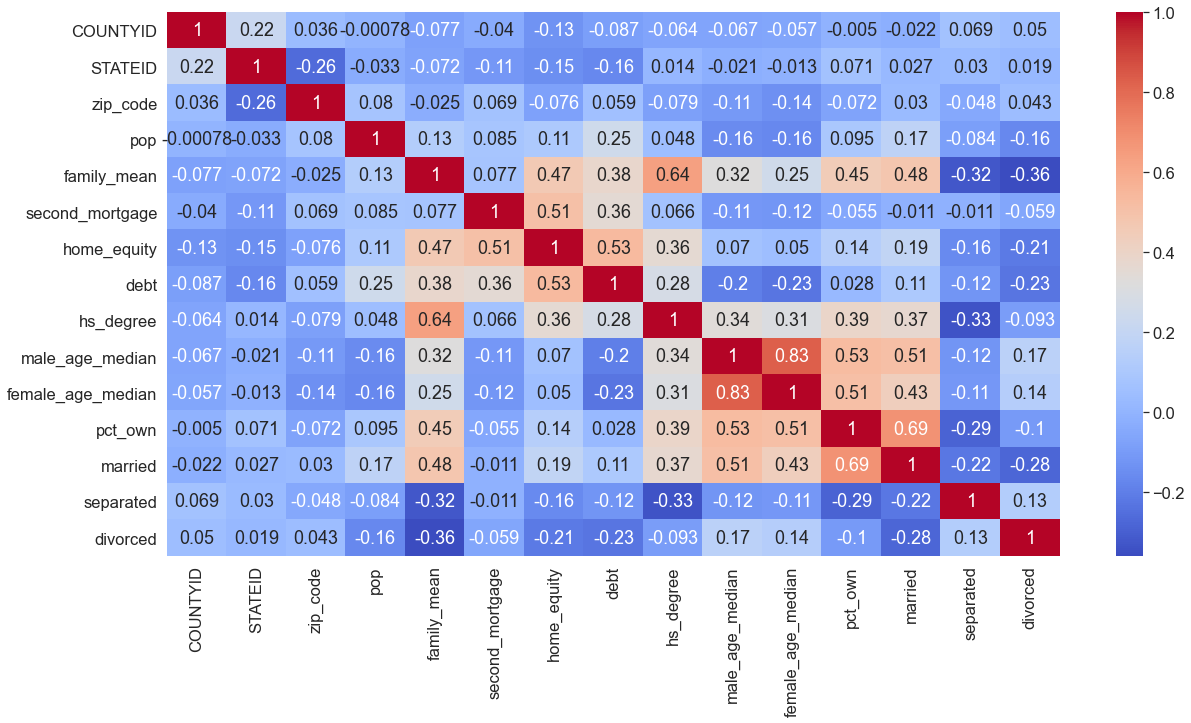

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27019 entries, 0 to 27320
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          27019 non-null  int64   
 1   COUNTYID                     27019 non-null  int64   
 2   STATEID                      27019 non-null  int64   
 3   state                        27019 non-null  object  
 4   state_ab                     27019 non-null  object  
 5   city                         27019 non-null  object  
 6   place                        27019 non-null  object  
 7   type                         27019 non-null  object  
 8   zip_code                     27019 non-null  int64   
 9   area_code                    27019 non-null  int64   
 10  lat                          27019 non-null  float64 
 11  lng                          27019 non-null  float64 
 12  ALand                        27019 non-null  float64 
 13  A

In [109]:
train_df['Bad_Debt'] = train_df['second_mortgage'] + train_df['home_equity'] - train_df['home_equity_second_mortgage']

In [110]:
for col in train_df.columns:
    print(col,' = ' ,train_df[col].dtype)

UID  =  int64
COUNTYID  =  int64
STATEID  =  int64
state  =  object
state_ab  =  object
city  =  object
place  =  object
type  =  object
zip_code  =  int64
area_code  =  int64
lat  =  float64
lng  =  float64
ALand  =  float64
AWater  =  int64
pop  =  int64
male_pop  =  int64
female_pop  =  int64
rent_mean  =  float64
rent_median  =  float64
rent_stdev  =  float64
rent_sample_weight  =  float64
rent_samples  =  float64
rent_gt_10  =  float64
rent_gt_15  =  float64
rent_gt_20  =  float64
rent_gt_25  =  float64
rent_gt_30  =  float64
rent_gt_35  =  float64
rent_gt_40  =  float64
rent_gt_50  =  float64
universe_samples  =  int64
used_samples  =  int64
hi_mean  =  float64
hi_median  =  float64
hi_stdev  =  float64
hi_sample_weight  =  float64
hi_samples  =  float64
family_mean  =  float64
family_median  =  float64
family_stdev  =  float64
family_sample_weight  =  float64
family_samples  =  float64
hc_mortgage_mean  =  float64
hc_mortgage_median  =  float64
hc_mortgage_stdev  =  float64
hc_m

In [111]:
cat_variables = ['state',
 'state_ab',
 'city',
 'place',
 'type',
]

In [112]:
num_variables = ['UID','COUNTYID','STATEID', 'zip_code', 'area_code','lat','lng','ALand','AWater','pop','male_pop', 'female_pop',
 'rent_mean','rent_median','rent_stdev','rent_sample_weight','rent_samples','rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25',
 'rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50','universe_samples','used_samples','hi_mean','hi_median','hi_stdev','hi_sample_weight',
 'hi_samples','family_mean','family_median','family_stdev','family_sample_weight','family_samples','hc_mortgage_mean','hc_mortgage_median',
 'hc_mortgage_stdev','hc_mortgage_sample_weight','hc_mortgage_samples', 'hc_mean', 'hc_median','hc_stdev','hc_samples','hc_sample_weight',
 'home_equity_second_mortgage','second_mortgage','home_equity','debt','second_mortgage_cdf','home_equity_cdf','debt_cdf','hs_degree',
 'hs_degree_male','hs_degree_female','male_age_mean','male_age_median','male_age_stdev','male_age_sample_weight','male_age_samples',
 'female_age_mean','female_age_median','female_age_stdev','female_age_sample_weight','female_age_samples','pct_own','married',
 'married_snp','separated','divorced','Bad_Debt']

In [113]:
fa_train_df = train_df[num_variables]
fa_train_df

UID  COUNTYID  STATEID  zip_code  area_code        lat         lng  \
0      267822        53       36     13346        315  42.840812  -75.501524   
1      246444       141       18     46616        574  41.701441  -86.266614   
2      245683        63       18     46122        317  39.792202  -86.515246   
3      279653       127       72       927        787  18.396103  -66.104169   
4      247218       161       20     66502        785  39.195573  -96.569366   
...       ...       ...      ...       ...        ...        ...         ...   
27316  279212        43       72       769        787  18.076060  -66.358379   
27317  277856        91       42     19422        215  40.158138  -75.307271   
27318  233000        87        8     80653        970  40.410316 -103.814003   
27319  287425       439       48     76034        817  32.904866  -97.162151   
27320  265371         3       32     89123        702  36.064754 -115.152237   

              ALand    AWater    pop  male_pop  female_pop   rent_mean  \
0      2.021834e+08   1699120   5230      2612        2618   769.38638   
1      1.560828e+06    100363   2633      1349        1284   804.87924   
2      6.956160e+07    284193   6881      3643        3238   742.77365   
3      1.105793e+06         0   2700      1141        1559   803.42018   
4      2.554403e+06         0   5637      2586        3051   938.56493   
...             ...       ...    ...       ...         ...         ...   
27316  6.970300e+05         0   1847       909         938   439.42839   
27317  5.077337e+06     11786   4155      2116        2039  1813.19253   
27318  1.323262e+09  17577610   2829      1465        1364   849.39107   
27319  1.865230e+07    158882  11542      5727        5815  1972.45746   
27320  7.796308e+06         0   3726      1815        1911   949.84199   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0            784.0   232.63967           272.34441         362.0     0.86761   
1            848.0   253.46747           312.58622         513.0     0.97410   
2            703.0   323.39011           291.85520         378.0     0.95238   
3            782.0   297.39258           259.30316         368.0     0.94693   
4            881.0   392.44096          1005.42886        1704.0     0.99286   
...            ...         ...                 ...           ...         ...   
27316        419.0   140.29970           170.00000         170.0     1.00000   
27317       1788.0   492.92300            64.84927         471.0     0.85435   
27318        834.0   336.47530           120.91448         195.0     0.93846   
27319       1843.0   633.02173            19.16328         157.0     1.00000   
27320        924.0   198.82109           555.87526        1031.0     0.94956   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0         0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1         0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2         0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3         0.87151     0.69832     0.61732     0.51397     0.46927     0.35754   
4         0.98247     0.91688     0.84740     0.78247     0.60974     0.55455   
...           ...         ...         ...         ...         ...         ...   
27316     1.00000     1.00000     0.83333     0.79012     0.79012     0.72222   
27317     0.63261     0.50000     0.37391     0.30870     0.30870     0.26304   
27318     0.71282     0.54359     0.44615     0.29744     0.23077     0.16923   
27319     1.00000     0.75796     0.61146     0.50318     0.50318     0.27389   
27320     0.87779     0.83705     0.63337     0.51115     0.41901     0.27934   

       rent_gt_50  universe_samples  used_samples       hi_mean  hi_median  \
0         0.12958               387           355   63125.28406    48120.0   
1         0.27888               542           502   41931.92593    351

In [114]:
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['COUNTYID','STATEID','lat','lng',])]]

In [115]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(fa_train_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.54796148e+01, 1.20114545e+01, 8.16503440e+00, 4.58170513e+00,
       3.93327207e+00, 3.06205512e+00, 2.14869445e+00, 1.54832600e+00,
       1.48291050e+00, 1.34492326e+00, 1.30003998e+00, 1.14591772e+00,
       1.03538491e+00, 9.75175971e-01, 8.52888983e-01, 7.72717495e-01,
       7.36442979e-01, 7.10461310e-01, 5.85800941e-01, 5.74126431e-01,
       5.49480399e-01, 5.01685229e-01, 4.88383281e-01, 4.34177308e-01,
       3.90237917e-01, 3.60209056e-01, 3.20246923e-01, 3.14284882e-01,
       3.04847630e-01, 2.56738815e-01, 2.46368352e-01, 2.30358325e-01,
       2.02215142e-01, 1.94047669e-01, 1.89621136e-01, 1.67526187e-01,
       1.63672935e-01, 1.34963988e-01, 1.31819080e-01, 1.21717923e-01,
       1.13224839e-01, 9.93809906e-02, 9.28682291e-02, 8.97772284e-02,
       5.77534793e-02, 5.57259631e-02, 4.73337725e-02, 4.59558058e-02,
       3.77244885e-02, 3.26460169e-02, 2.80009706e-02, 2.45163429e-02,
       2.01138452e-02, 1.65389184e-02, 1.55250503e-02, 1.50860496e-02,
      

In [117]:
print(sorted(ev,))

[2.0807448066841072e-16, 1.498848559097174e-15, 0.00044542678809433194, 0.0012183640027078502, 0.0025147842731133223, 0.002658075395064511, 0.003157188299615511, 0.003581809666936499, 0.004719013434512463, 0.006919238620539721, 0.008648892286418538, 0.010025800927756309, 0.014390354751365436, 0.015086049566099874, 0.015525050251326718, 0.016538918363320745, 0.020113845245985654, 0.024516342901951826, 0.028000970635954768, 0.032646016896399614, 0.037724488509944684, 0.04595580576165212, 0.04733377248836864, 0.05572596309911661, 0.05775347928851887, 0.08977722837898074, 0.09286822905836241, 0.09938099064486902, 0.11322483851494092, 0.12171792260337373, 0.13181908004906936, 0.13496398756405287, 0.16367293526870524, 0.1675261865849374, 0.1896211363338694, 0.1940476689533682, 0.20221514210358602, 0.2303583245959046, 0.2463683521213322, 0.256738815396396, 0.30484762990460396, 0.3142848823775822, 0.3202469233976112, 0.3602090563305132, 0.3902379173993906, 0.4341773078827861, 0.488383281412939

In [118]:
loadings = fa.loadings_

In [119]:
xvals = range(1, fa_train_df.shape[1]+1)

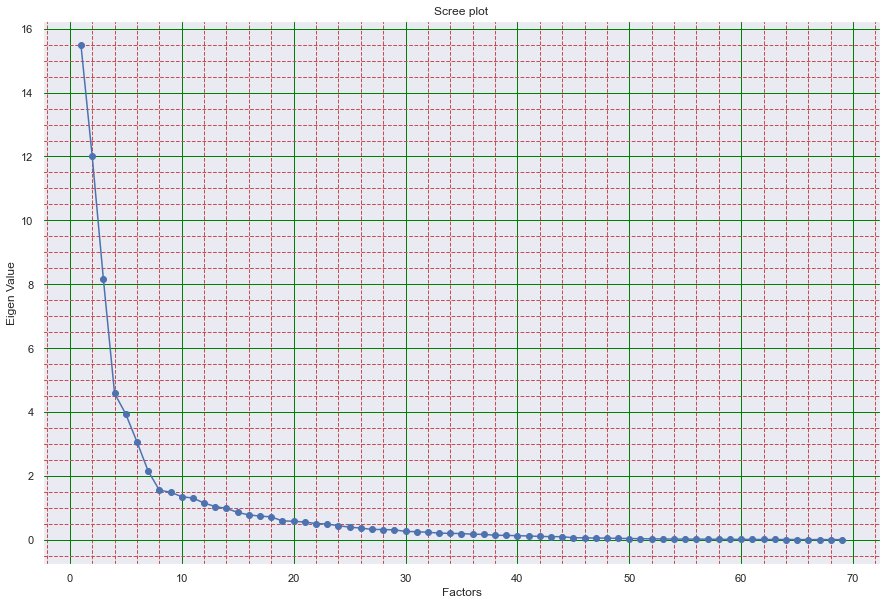

In [120]:
sns.set()
plt.figure(figsize = (15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'green', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [121]:
Factors  = pd.DataFrame.from_records(loadings)
Factors = Factors.add_prefix('Factor ')
Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
UID                         -0.077596 -0.005912 -0.160150 -0.089152  0.064134   
zip_code                    -0.033732  0.090385  0.058919 -0.104747 -0.046177   
area_code                    0.020546  0.016520  0.017181  0.026291  0.001856   
ALand                       -0.041496 -0.046072 -0.118814 -0.045479  0.045941   
AWater                      -0.008581 -0.022861 -0.031445 -0.025663  0.026467   
pop                          0.312113  0.929652 -0.061383  0.033231  0.023261   
male_pop                     0.301582  0.903810 -0.055534  0.009515  0.025334   
female_pop                   0.310734  0.920013 -0.064818  0.055320  0.020320   
rent_mean                    0.743732 -0.075226  0.357637  0.143488  0.098671   
rent_median                  0.702145 -0.069626  0.348256  0.129354  0.079666   
rent_stdev                   0.562597 -0.060136  0.263551  0.155247  0.205355   
rent_sample_weight          -0.409924  0.490141  0.229983 -0.183515  0.267992   
rent_samples                -0.127223  0.573900  0.456014 -0.183095  0.393583   
rent_gt_10                  -0.060862  0.116914  0.269571  0.295956 -0.163787   
rent_gt_15                  -0.123098  0.137628  0.422956  0.500764 -0.182356   
rent_gt_20                  -0.220565  0.120693  0.462668  0.596757 -0.139327   
rent_gt_25                  -0.284389  0.110596  0.482168  0.679329 -0.116806   
rent_gt_30                  -0.307219  0.099020  0.465401  0.696905 -0.102486   
rent_gt_35                  -0.302743  0.083318  0.453447  0.702086 -0.081946   
rent_gt_40                  -0.300053  0.072453  0.442581  0.689908 -0.071711   
rent_gt_50                  -0.276521  0.047079  0.403543  0.594196 -0.041872   
universe_samples            -0.143267  0.593654  0.423208 -0.171029  0.399718   
used_samples                -0.117594  0.576890  0.447635 -0.181448  0.389943   
hi_mean                      0.943077 -0.147234  0.012830 -0.016259  0.075587   
hi_median                    0.914089 -0.134482  0.000849 -0.044412  0.023795   
hi_stdev                     0.876351 -0.157372  0.041420  0.076418  0.212801   
hi_sample_weight            -0.181810  0.874210 -0.155880  0.071248  0.112159   
hi_samples                   0.324648  0.878582 -0.164777  0.048530  0.113702   
family_mean                  0.935178 -0.172472  0.003265 -0.000343  0.136463   
family_median                0.910606 -0.171049  0.001261 -0.010209  0.120264   
family_stdev                 0.805823 -0.140787  0.050887  0.070713  0.224514   
family_sample_weight        -0.140428  0.878434 -0.224347  0.099347 -0.049966   
family_samples               0.400397  0.834953 -0.254217  0.089026 -0.052727   
hc_mortgage_mean             0.786079 -0.135507  0.393283  0.106683  0.278957   
hc_mortgage_median           0.765527 -0.133562  0.400878  0.098939  0.271786   
hc_mortgage_stdev            0.683793 -0.137525  0.172544  0.141481  0.249126   
hc_mortgage_sample_weight    0.122760  0.644690 -0.503408  0.033589 -0.313583   
hc_mortgage_samples          0.591376  0.605718 -0.276426  0.070738 -0.243665   
hc_mean                      0.703671 -0.168746  0.296476  0.108174  0.345752   
hc_median                    0.672333 -0.159122  0.296020  0.097642  0.330089   
hc_stdev                     0.539171 -0.127850  0.138949  0.140513  0.343838   
hc_samples                   0.115084  0.415911 -0.713382  0.289415  0.074781   
hc_sample_weight            -0.094535  0.414708 -0.736990  0.240305  0.007335   
home_equity_second_mortgage  0.182939  0.089819  0.298799 -0.152366 -0.597072   
second_mortgage              0.205049  0.084046  0.325027 -0.144140 -0.617343   
home_equity                  0.597270 -0.024601  0.302039 -0.058138 -0.472422   
debt                         0.498359  0.160430  0.445734 -0.190601 -0.373983   
second_mortgage_cdf         -0.330222 -0.097416 -0.133053  0.072059  0.576977   
home_equity_cdf             -0.640792  0.013454 -0.250292  0

In [122]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(fa_train_df)
loadings = fa.loadings_

In [123]:
Factors  = pd.DataFrame.from_records(loadings)
Factors = Factors.add_prefix('Factor ')
Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
UID                         -0.112586  0.004241 -0.036947 -0.101178 -0.061646   
zip_code                    -0.020936  0.051244  0.033846 -0.033193 -0.101020   
area_code                    0.039809  0.030462 -0.049947  0.001307 -0.022502   
ALand                       -0.036622 -0.025379 -0.041890 -0.041833  0.018012   
AWater                       0.001326 -0.016861 -0.009558 -0.013094 -0.005574   
pop                          0.121939  0.971792  0.111528 -0.008067 -0.103230   
male_pop                     0.119778  0.945261  0.089806 -0.021777 -0.103149   
female_pop                   0.118522  0.955360  0.129842  0.005611 -0.098871   
rent_mean                    0.808782  0.062231 -0.100383  0.038873 -0.018580   
rent_median                  0.762394  0.060685 -0.110384  0.031670 -0.032132   
rent_stdev                   0.668352  0.029767  0.063406  0.089784  0.052039   
rent_sample_weight          -0.324103  0.206623  0.780014  0.041462 -0.116369   
rent_samples                 0.013260  0.294747  0.922634  0.051875 -0.138046   
rent_gt_10                  -0.028781  0.046464  0.032087  0.207633 -0.037483   
rent_gt_15                  -0.015051  0.030140  0.060974  0.377503 -0.046665   
rent_gt_20                  -0.043850 -0.001858  0.084753  0.586947 -0.037424   
rent_gt_25                  -0.065369 -0.015178  0.083076  0.747218 -0.037764   
rent_gt_30                  -0.074697 -0.016458  0.059100  0.866916 -0.043346   
rent_gt_35                  -0.062914 -0.020261  0.042529  0.938167 -0.049149   
rent_gt_40                  -0.061378 -0.026337  0.039248  0.941419 -0.055728   
rent_gt_50                  -0.050104 -0.045853  0.048031  0.833201 -0.063082   
universe_samples            -0.006127  0.316879  0.919778  0.052528 -0.131339   
used_samples                 0.018020  0.300070  0.922395  0.046027 -0.136913   
hi_mean                      0.847878  0.106410 -0.264597 -0.202405  0.043355   
hi_median                    0.795632  0.118389 -0.306857 -0.224085  0.016670   
hi_stdev                     0.851093  0.058902 -0.101032 -0.093312  0.112266   
hi_sample_weight            -0.328824  0.757185  0.474313  0.057306  0.124525   
hi_samples                   0.090486  0.902417  0.307074 -0.054175  0.123619   
family_mean                  0.843559  0.067521 -0.178556 -0.181603  0.098713   
family_median                0.817412  0.067301 -0.200844 -0.185023  0.078389   
family_stdev                 0.773865  0.041602 -0.019026 -0.077581  0.134260   
family_sample_weight        -0.310430  0.843632  0.131328  0.035218  0.009630   
family_samples               0.125283  0.952476 -0.040137 -0.074422  0.041767   
hc_mortgage_mean             0.938839 -0.009591  0.055698  0.008556  0.003559   
hc_mortgage_median           0.922268 -0.013643  0.052785  0.012035 -0.015125   
hc_mortgage_stdev            0.767894  0.004274  0.031681 -0.014528  0.149501   
hc_mortgage_sample_weight   -0.302301  0.761043 -0.235995 -0.105659  0.138672   
hc_mortgage_samples          0.209518  0.799823 -0.267430 -0.105242  0.086782   
hc_mean                      0.853213 -0.040512  0.049257 -0.006198  0.012949   
hc_median                    0.815786 -0.039625  0.049551 -0.005243 -0.001234   
hc_stdev                     0.675426 -0.012413  0.061338  0.003860  0.109676   
hc_samples                  -0.111502  0.609176 -0.244100 -0.066836  0.407314   
hc_sample_weight            -0.318933  0.556084 -0.235377 -0.061118  0.365835   
home_equity_second_mortgage  0.036599  0.030742  0.040411  0.004534 -0.082194   
second_mortgage              0.065682  0.025479  0.039618  0.016296 -0.079209   
home_equity                  0.375872  0.033172 -0.021182 -0.028242  0.001330   
debt                         0.315265  0.158853  0.005795 -0.029053 -0.221256   
second_mortgage_cdf         -0.100654 -0.121830  0.086851  0.021597 -0.002031   
home_equity_cdf             -0.394038 -0.065048  0.045667  0

In [124]:
Factors_df = round(Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 'second_mortgage', 'second_mortgage_cdf', 'pct_own', 'Bad_Debt'], :], 2)

In [125]:
len(fa_train_df.columns)

69

In [126]:
# Get variance of each factors
fact_variance  = fa.get_factor_variance()
fact_variance

(array([12.05075025, 11.61628359,  5.09717084,  4.75177647,  4.40186725,
         3.56509927,  2.96710152,  2.09472564,  1.99794727,  1.86158467,
         1.77481955,  1.05669516]),
 array([0.17464855, 0.16835194, 0.07387204, 0.06886633, 0.06379518,
        0.05166811, 0.04300147, 0.03035834, 0.02895576, 0.02697949,
        0.02572202, 0.01531442]),
 array([0.17464855, 0.34300049, 0.41687253, 0.48573886, 0.54953403,
        0.60120214, 0.64420361, 0.67456195, 0.70351771, 0.7304972 ,
        0.75621922, 0.77153364]))

In [127]:
Factor_variance  = pd.DataFrame.from_records(fact_variance)
Factor_variance = Factor_variance.add_prefix('Factor ')
Factor_variance.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
round(Factor_variance, 2)

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
SS Loadings        12.05     11.62      5.10      4.75      4.40      3.57   
Proportion Var      0.17      0.17      0.07      0.07      0.06      0.05   
Cumulative Var      0.17      0.34      0.42      0.49      0.55      0.60   

                Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
SS Loadings         2.97      2.09      2.00      1.86       1.77       1.06  
Proportion Var      0.04      0.03      0.03      0.03       0.03       0.02  
Cumulative Var      0.64      0.67      0.70      0.73       0.76       0.77

In [128]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [129]:
train_df.drop(['state_ab','bins','bad_debt','Bad_Debt'],axis=1,inplace=True)

In [130]:
train_df.head()

UID  COUNTYID  STATEID        state        city           place   type  \
0  267822        53       36     New York    Hamilton        Hamilton   City   
1  246444       141       18      Indiana  South Bend        Roseland   City   
2  245683        63       18      Indiana    Danville        Danville   City   
3  279653       127       72  Puerto Rico    San Juan        Guaynabo  Urban   
4  247218       161       20       Kansas   Manhattan  Manhattan City   City   

   zip_code  area_code        lat        lng        ALand   AWater   pop  \
0     13346        315  42.840812 -75.501524  202183361.0  1699120  5230   
1     46616        574  41.701441 -86.266614    1560828.0   100363  2633   
2     46122        317  39.792202 -86.515246   69561595.0   284193  6881   
3       927        787  18.396103 -66.104169    1105793.0        0  2700   
4     66502        785  39.195573 -96.569366    2554403.0        0  5637   

   male_pop  female_pop  rent_mean  rent_median  rent_stdev  \
0      2612        2618  769.38638        784.0   232.63967   
1      1349        1284  804.87924        848.0   253.46747   
2      3643        3238  742.77365        703.0   323.39011   
3      1141        1559  803.42018        782.0   297.39258   
4      2586        3051  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
0     0.45634     0.42817     0.18592     0.15493     0.12958   
1     0.69920     0.55179     0.41235     0.39044     0.27888   
2     0.66667     0.39153     0.39153     0.28307     0.15873   
3     0.61732     0.51397     0.46927     0.35754     0.32961   
4     0.84740     0.78247     0.60974     0.55455     0.44416   

   universe_samples  used_samples      hi_mean  hi_median     hi_stdev  \
0               387           355  63125.28406    48120.0  49042.01206   
1               542           502  41931.92593    35186.0  31639.50203   
2               459           378  84942.68317    74964.0  56811.62186   
3               438           358  48733.67116    37845.0  45100.54010   
4              1725          1540  31834.15466    22497.0  34046.50907   

   hi_sample_weight  hi_samples  family_mean  family_median  family_stdev  \
0        1290.96240      2024.0  67994.14790        53245.0   47667.30119   
1         838.74664      1127.0  50670.10337        43023.0   34715.57548   
2        1155.20980      2488.0  95262.51431        85395.0   49292.67664   
3         928.32193      1267.0  56401.68133        44399.0   41082.90515   
4        1548.67477      1983.0  54053.42396        50272.0   39609.12605   

   family_sample_weight  family_samples  hc_mortgage_mean  hc_mortgage_median  \
0             884.33516          1491.0        1414.80295              1223.0   
1             375.28798           554.0         864.41390               784.0   
2             709.74925          1889.0        1506.06758              1361.0   
3             490.18479           729.0        1175.28642              1101.0   
4             244.08903           395.0        1192.58759              1125.0   

   hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
0          641.22898                  377.83135                867.0   
1          482.27020                  316.88320                356.0   
2          731.89394                  699.41354               1491.0   
3          428.98751                  261.28471                437.0   
4          327.49674                   76.61052                134.0   

     hc_mean  hc_me

In [131]:
train_df.shape

(27019, 76)

In [132]:
test_df.shape

(11603, 77)

In [133]:
test_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [134]:
test_df.drop(['state_ab'],axis = 1, inplace = True)

In [135]:
test_df.shape

(11603, 76)

In [136]:
num_2_cat = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [137]:
train_df[num_2_cat].dtypes

UID            int64
COUNTYID       int64
STATEID        int64
zip_code       int64
area_code      int64
lat          float64
lng          float64
dtype: object

In [138]:
for col in num_2_cat:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [139]:
train_df[num_2_cat].dtypes

UID          category
COUNTYID     category
STATEID      category
zip_code     category
area_code    category
lat          category
lng          category
dtype: object

In [140]:
test_df[num_2_cat].dtypes

UID          category
COUNTYID     category
STATEID      category
zip_code     category
area_code    category
lat          category
lng          category
dtype: object

In [141]:
train_df.dtypes

UID                            category
COUNTYID                       category
STATEID                        category
state                            object
city                             object
place                            object
type                             object
zip_code                       category
area_code                      category
lat                            category
lng                            category
ALand                           float64
AWater                            int64
pop                               int64
male_pop                          int64
female_pop                        int64
rent_mean                       float64
rent_median                     float64
rent_stdev                      float64
rent_sample_weight              float64
rent_samples                    float64
rent_gt_10                      float64
rent_gt_15                      float64
rent_gt_20                      float64
rent_gt_25                      float64


In [142]:
obj_2_cat = ['state', 'city', 'place', 'type']

In [143]:
for col in obj_2_cat:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27019 entries, 0 to 27320
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          27019 non-null  category
 1   COUNTYID                     27019 non-null  category
 2   STATEID                      27019 non-null  category
 3   state                        27019 non-null  category
 4   city                         27019 non-null  category
 5   place                        27019 non-null  category
 6   type                         27019 non-null  category
 7   zip_code                     27019 non-null  category
 8   area_code                    27019 non-null  category
 9   lat                          27019 non-null  category
 10  lng                          27019 non-null  category
 11  ALand                        27019 non-null  float64 
 12  AWater                       27019 non-null  int64   
 13  p

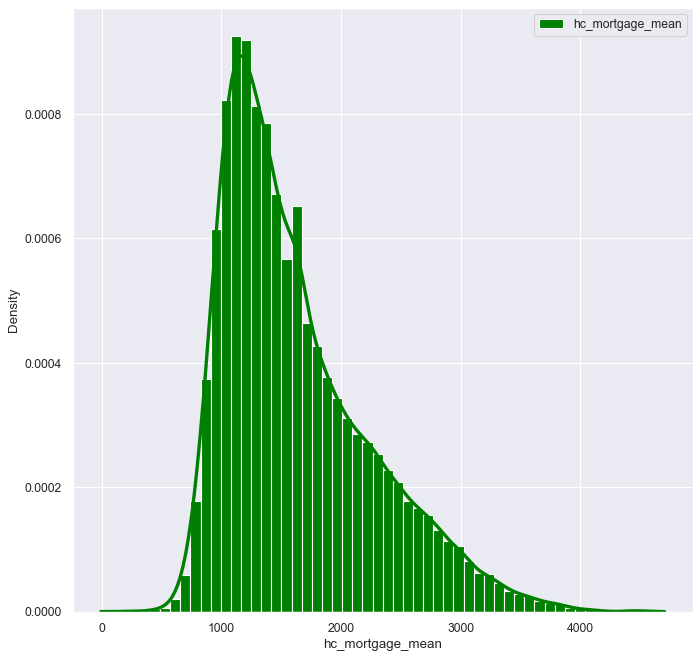

In [145]:
kwargs = dict(hist_kws={'alpha':1}, kde_kws={'linewidth':3})

plt.figure(figsize=(10,10), dpi= 80)
sns.distplot(train_df.hc_mortgage_mean, color="green", label="hc_mortgage_mean", **kwargs)
plt.legend();

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS

In [147]:
lin_reg = LinearRegression()

In [148]:
cols_2_drop = ['UID', 'state', 'COUNTYID', 'STATEID', 'city', 'place', 'type', 'zip_code', 'area_code', 'lat', 'lng']

In [149]:
train_df.drop(cols_2_drop, axis=1, inplace=True)
test_df.drop(cols_2_drop, axis=1, inplace=True)

In [150]:
train_y = train_df['hc_mortgage_mean']
test_y = test_df['hc_mortgage_mean']

In [151]:
train_X = train_df.drop(columns=['hc_mortgage_mean'])
test_X = test_df.drop(columns=['hc_mortgage_mean'])

In [152]:
print(train_X.shape, train_y.shape, test_X.shape,test_y.shape)

(27019, 64) (27019,) (11603, 64) (11603,)


In [153]:
lin_reg.fit(train_X,train_y)

LinearRegression()

In [154]:
pred_y = lin_reg.predict(test_X)

In [155]:
pred_y

array([1140.29712564, 1512.54387678, 1221.32683601, ..., 1853.70247831,
       1158.76921634, 1387.54097806])

In [156]:
# model evaluation for testing set

mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
adj_rsqrd = 1 - (1-r2)*(len(test_y) - 1) / (len(test_y) - (test_X.shape[1] - 1) - 1)
print('Mean Absolute Error is {}'.format(round(mae, 3)))
print('Mean Squared Error is {}'.format(round(mse, 3)))
print('Root Mean Squared Error is {}'.format(round(mse**(0.5), 3)))
print('R-Square score is {}'.format(round(r2, 3)))
print('Adjusted R-Square score is {}'.format(round(adj_rsqrd, 3)))

Mean Absolute Error is 44.429
Mean Squared Error is 5015.094
Root Mean Squared Error is 70.817
R-Square score is 0.987
Adjusted R-Square score is 0.987


# The accuracy levels and R square at a Nation level.
Since R-square is 98.7%. model is accurate.State level regression analysis is not required

In [157]:
correlated_features = set()
correlation_matrix = train_df.drop('hc_mortgage_mean', axis=1).corr()

In [158]:
correlation_matrix

ALand    AWater       pop  male_pop  \
ALand                        1.000000  0.413671 -0.036081 -0.025621   
AWater                       0.413671  1.000000 -0.016652 -0.013612   
pop                         -0.036081 -0.016652  1.000000  0.980916   
male_pop                    -0.025621 -0.013612  0.980916  1.000000   
female_pop                  -0.045048 -0.019027  0.981439  0.925422   
rent_mean                   -0.067422 -0.009582  0.162924  0.160013   
rent_median                 -0.065765 -0.009393  0.156708  0.154592   
rent_stdev                  -0.033652  0.002468  0.118136  0.108759   
rent_sample_weight          -0.046308 -0.017056  0.247401  0.224763   
rent_samples                -0.067790 -0.020252  0.406672  0.383447   
rent_gt_10                  -0.098697 -0.029499  0.064624  0.051021   
rent_gt_15                  -0.097052 -0.028691  0.060280  0.045027   
rent_gt_20                  -0.084723 -0.032941  0.021006  0.006744   
rent_gt_25                  -0.076661 -0.028790 -0.001991 -0.015356   
rent_gt_30                  -0.062345 -0.023977 -0.013999 -0.026806   
rent_gt_35                  -0.056424 -0.023381 -0.022439 -0.033588   
rent_gt_40                  -0.049869 -0.019539 -0.029887 -0.040599   
rent_gt_50                  -0.049702 -0.017993 -0.046119 -0.056091   
universe_samples            -0.059325 -0.018840  0.424884  0.399228   
used_samples                -0.067041 -0.020311  0.414677  0.388983   
hi_mean                     -0.028725 -0.002232  0.173868  0.175732   
hi_median                   -0.030005 -0.002207  0.180338  0.182920   
hi_stdev                    -0.018642  0.000784  0.131390  0.128455   
hi_sample_weight            -0.028512 -0.018335  0.710296  0.673333   
hi_samples                  -0.042085 -0.019306  0.897350  0.857665   
family_mean                 -0.028141 -0.002117  0.134395  0.133820   
family_median               -0.029566 -0.002489  0.130222  0.129612   
family_stdev                -0.018214  0.001692  0.111936  0.108743   
family_sample_weight        -0.013156 -0.014358  0.784932  0.757128   
family_samples              -0.028408 -0.015563  0.930581  0.898409   
hc_mortgage_median          -0.057968 -0.010897  0.110547  0.107893   
hc_mortgage_stdev           -0.015473  0.005096  0.084803  0.083352   
hc_mortgage_sample_weight   -0.010268 -0.014672  0.645214  0.620826   
hc_mortgage_samples         -0.038050 -0.016985  0.774241  0.747064   
hc_mean                     -0.056751 -0.010590  0.057414  0.048706   
hc_median                   -0.058165 -0.010922  0.056097  0.046975   
hc_stdev                    -0.006400  0.004735  0.055962  0.052662   
hc_samples                   0.051854  0.008908  0.458678  0.441285   
hc_sample_weight             0.067830  0.010834  0.386986  0.375081   
home_equity_second_mortgage -0.042531 -0.014830  0.084978  0.081578   
second_mortgage             -0.044410 -0.014817  0.084867  0.081213   
home_equity                 -0.080306 -0.024547  0.105696  0.100935   
debt                        -0.117135 -0.041554  0.247888  0.236359   
second_mortgage_cdf          0.047465  0.016077 -0.152876 -0.146775   
home_equity_cdf              0.087734  0.025872 -0.132071 -0.123673   
debt_cdf                     0.106694  0.035456 -0.254184 -0.243430   
hs_degree                   -0.002706  0.006169  0.047779  0.030239   
hs_degree_male              -0.006499  0.005950  0.056287  0.037469   
hs_degree_female             0.003046  0.005889  0.037697  0.028657   
male_age_mean                0.043723  0.007767 -0.192439 -0.205537   
male_age_median              0.050695  0.010537 -0.155431 -0.166188   
male_age_stdev               0.034123 -0.001746 -0.027974 -0.075688   
male_age_sample_weight      -0.024953 -0.012675  0.912969  0.942592   
male_age_samples            -0.025676 -0.013631  0.980439  0.999556   
female_age_mean              0.017361 -0.005620 -0.196112 -0.199602   
female_age_median            0.030907 -0.001258 -0.16380

In [159]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [160]:
correlated_features

{'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [161]:
corr_list = ['debt_cdf', 'family_mean', 'family_median', 'family_sample_weight', 'family_samples', 'family_stdev', 'female_age_mean',
 'female_age_median', 'female_age_sample_weight', 'female_age_samples', 'female_pop', 'hc_median', 'hc_mortgage_samples', 'hc_sample_weight',
 'hi_median', 'hi_samples', 'hi_stdev', 'home_equity_cdf', 'hs_degree_female', 'hs_degree_male', 'male_age_median', 'male_age_sample_weight',
 'male_age_samples', 'male_pop', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'rent_median', 'rent_samples',
 'second_mortgage', 'universe_samples', 'used_samples']

In [162]:
train_df.drop(corr_list, axis=1, inplace=True)
test_df.drop(corr_list, axis=1, inplace=True)

In [163]:
print(train_df.shape, test_df.shape)

(27019, 31) (11603, 31)


In [164]:
train_df.head()

ALand   AWater   pop  rent_mean  rent_stdev  rent_sample_weight  \
0  202183361.0  1699120  5230  769.38638   232.63967           272.34441   
1    1560828.0   100363  2633  804.87924   253.46747           312.58622   
2   69561595.0   284193  6881  742.77365   323.39011           291.85520   
3    1105793.0        0  2700  803.42018   297.39258           259.30316   
4    2554403.0        0  5637  938.56493   392.44096          1005.42886   

   rent_gt_10  rent_gt_15  rent_gt_20      hi_mean  hi_sample_weight  \
0     0.86761     0.79155     0.59155  63125.28406        1290.96240   
1     0.97410     0.93227     0.69920  41931.92593         838.74664   
2     0.95238     0.88624     0.79630  84942.68317        1155.20980   
3     0.94693     0.87151     0.69832  48733.67116         928.32193   
4     0.99286     0.98247     0.91688  31834.15466        1548.67477   

   hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0        1414.80295              1223.0          641.22898   
1         864.41390               784.0          482.27020   
2        1506.06758              1361.0          731.89394   
3        1175.28642              1101.0          428.98751   
4        1192.58759              1125.0          327.49674   

   hc_mortgage_sample_weight    hc_mean   hc_stdev  hc_samples  \
0                  377.83135  570.01530  270.11299       770.0   
1                  316.88320  351.98293  125.40457       229.0   
2                  699.41354  556.45986  184.42175       538.0   
3                  261.28471  288.04047  185.55887       392.0   
4                   76.61052  443.68855   76.12674       124.0   

   home_equity_second_mortgage  home_equity     debt  second_mortgage_cdf  \
0                      0.01588      0.08919  0.52963              0.43658   
1                      0.02222      0.04274  0.60855              0.42174   
2                      0.00000      0.09512  0.73484              1.00000   
3                      0.01086      0.01086  0.52714              0.53057   
4                      0.05426      0.05426  0.51938              0.18332   

   hs_degree  male_age_mean  male_age_stdev  female_age_stdev  pct_own  \
0    0.89288       42.48574        22.97306          22.51276  0.79046   
1    0.90487       34.84728        20.37452          23.43353  0.52483   
2    0.94288       39.38154        22.89769          23.94119  0.85331   
3    0.91500       48.64749        23.05968          24.32015  0.65037   
4    1.00000       26.07533        11.84399          11.10484  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109

In [165]:
train_X = train_df.drop(columns=['hc_mortgage_mean'])
train_y = train_df['hc_mortgage_mean']

In [166]:
lin_reg.fit(train_X, train_y)

LinearRegression()

In [167]:
test_X = test_df.drop(columns=['hc_mortgage_mean'])
test_y = test_df['hc_mortgage_mean']

In [168]:
pred_y = lin_reg.predict(test_X)

In [169]:
# model evaluation for testing set
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
adj_rsqrd = 1 - (1-r2)*(len(test_y) - 1) / (len(test_y) - (test_X.shape[1] - 1) - 1)
print('Mean Absolute Error is {}'.format(round(mae, 3)))
print('Mean Squared Error is {}'.format(round(mse, 3)))
print('Root Mean Squared Error is {}'.format(round(mse**(0.5), 3)))
print('R-Square score is {}'.format(round(r2, 3)))
print('Adjusted R-Square score is {}'.format(round(adj_rsqrd, 3)))

Mean Absolute Error is 44.819
Mean Squared Error is 5141.608
Root Mean Squared Error is 71.705
R-Square score is 0.987
Adjusted R-Square score is 0.987


In [170]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [171]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(1,len(test_df))
    randomlist.append(n)
print(randomlist)

[4447, 4293, 6909, 5268, 653, 5747, 6175, 11502, 11070, 4851, 6336, 9986, 7467, 6265, 8348, 8630, 8271, 9496, 11207, 10017, 6324, 8437, 509, 9311, 8738, 658, 9620, 953, 8416, 5024, 9939, 4291, 5794, 3516, 3178, 3865, 102, 8585, 9307, 731, 6918, 9581, 5982, 10467, 9070, 251, 10913, 8247, 7105, 9938, 7197, 1272, 769, 1177, 4847, 9159, 430, 7118, 8720, 9596, 10788, 10817, 2643, 8695, 222, 2224, 5538, 11538, 10621, 8451, 6963, 6435, 602, 6523, 11102, 10607, 3091, 10069, 3389, 1759, 7052, 10900, 4912, 866, 11038, 8201, 3345, 3721, 498, 1312, 10993, 8345, 3333, 10970, 8319, 8295, 7067, 1522, 4067, 8502]


In [172]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(test_X.iloc[i])]
    pre_data_out = lin_reg.predict(data_in)
    data_out = test_y.iloc[i]
    
    print(i, pre_data_out, data_out)
    
    pre_out.append(pre_data_out)
    out.append(data_out)

4447 [1078.69377576] 1086.4188900000001
4293 [786.09495242] 739.61163
6909 [1565.47212696] 1559.68985
5268 [2036.29265667] 1926.39242
653 [1826.33920845] 1778.8648899999998
5747 [2631.1294642] 2663.08793
6175 [1265.62127071] 1203.76602
11502 [2257.08784535] 2272.6168399999997
11070 [1398.95780998] 1355.35852
4851 [1565.51625888] 1566.79724
6336 [847.47157519] 858.7098699999999
9986 [2194.25799951] 2163.43284
7467 [1018.04127466] 1061.90173
6265 [1259.1128559] 1224.85055
8348 [1404.18697123] 1517.15876
8630 [1989.69405879] 1921.88825
8271 [1075.47725982] 1137.12158
9496 [1228.29937518] 1256.53099
11207 [1762.32893384] 1748.4288800000002
10017 [1828.49436631] 1750.13017
6324 [2979.76297875] 2888.2056399999997
8437 [1157.49912753] 1173.0045699999998
509 [1112.38818691] 1106.7562300000002
9311 [1184.86544839] 1196.6210800000001
8738 [2750.08236544] 2794.7814
658 [3106.66117086] 2882.1154899999997
9620 [2117.51893364] 2207.9828399999997
953 [1986.41166065] 2037.75016
8416 [955.30273534] 907

In [173]:
pre_out

[array([1078.69377576]),
 array([786.09495242]),
 array([1565.47212696]),
 array([2036.29265667]),
 array([1826.33920845]),
 array([2631.1294642]),
 array([1265.62127071]),
 array([2257.08784535]),
 array([1398.95780998]),
 array([1565.51625888]),
 array([847.47157519]),
 array([2194.25799951]),
 array([1018.04127466]),
 array([1259.1128559]),
 array([1404.18697123]),
 array([1989.69405879]),
 array([1075.47725982]),
 array([1228.29937518]),
 array([1762.32893384]),
 array([1828.49436631]),
 array([2979.76297875]),
 array([1157.49912753]),
 array([1112.38818691]),
 array([1184.86544839]),
 array([2750.08236544]),
 array([3106.66117086]),
 array([2117.51893364]),
 array([1986.41166065]),
 array([955.30273534]),
 array([1220.46362472]),
 array([1654.09986705]),
 array([1975.37719403]),
 array([923.08474755]),
 array([1070.40831171]),
 array([1377.61862563]),
 array([1194.53052854]),
 array([1170.30204322]),
 array([1233.7722339]),
 array([1601.58967648]),
 array([952.681987]),
 array([30

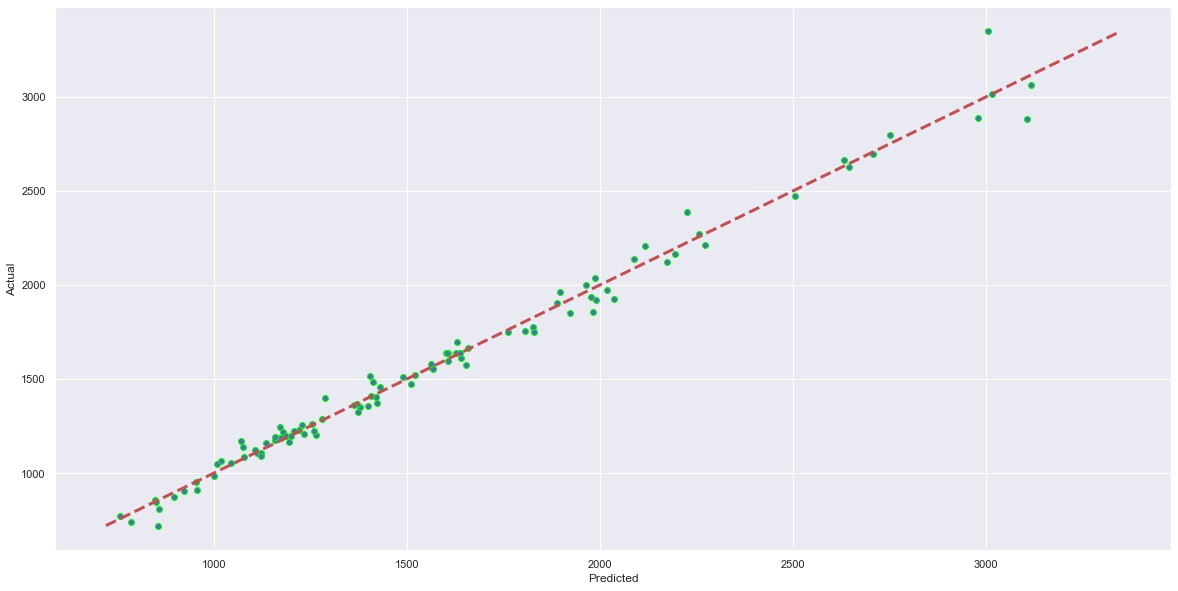

In [174]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(pre_out, out, edgecolors=(0, 1, 0))
ax.plot([min(out), max(out)], [min(out), max(out)], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [175]:
# model evaluation for testing set
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
adj_rsqrd = 1 - (1-r2)*(len(test_y) - 1) / (len(test_y) - (test_X.shape[1] - 1) - 1)
print('Mean Absolute Error is {}'.format(round(mae, 3)))
print('Mean Squared Error is {}'.format(round(mse, 3)))
print('Root Mean Squared Error is {}'.format(round(mse**(0.5), 3)))
print('R-Square score is {}'.format(round(r2, 3)))
print('Adjusted R-Square score is {}'.format(round(adj_rsqrd, 3)))

Mean Absolute Error is 44.819
Mean Squared Error is 5141.608
Root Mean Squared Error is 71.705
R-Square score is 0.987
Adjusted R-Square score is 0.987


# Values are still intact. Target variable(Dependent Variable) is highly depending on Independent Variables. hence model accuracy is successfully established even after removing multicollinear variables.